# About the Dataset
This clean, combined dataset from India's Environment Ministry and Pollution Control Board lets you explore air pollution levels across states and years. Given that air pollution causes millions of deaths annually and India ranks among the most affected, this data helps uncover local trends and examine the impact of environmental policies.

## Key Questions for Exploration
- How has air quality changed over the years in major Indian cities?
- Which states or cities show the highest average pollution levels?
- Are there visible seasonal trends in pollutant levels?
- How does RSPM (Respirable Suspended Particulate Matter) vary over time?
- Can any change be linked to specific environmental regulations or events?

## Suggested Visualizations
- **Line Plot:** Average RSPM levels over years for top polluted cities.
- **Heatmap:** Average pollutant levels across states and months.
- **Bar Chart:** Top 10 most polluted cities based on yearly averages.
- **Boxplot:** Distribution of RSPM levels by season or region.
- **Trend Comparison:** Before and after a known policy implementation year.

### Visualization Tools
You can use `matplotlib`, `seaborn`, or `plotly` for these visualizations. Let me know if you want ready-to-run code snippets!


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder ## use for targer vairable
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

### 📊 Understanding Regression Metrics

In simple words:

- **Mean Absolute Error (MAE)** tells you the average size of the mistakes your model makes, without caring whether they are too high or too low — it just looks at the absolute difference.

- **Mean Squared Error (MSE)** also measures the average mistakes, but it squares the errors first, so bigger mistakes count much more than small ones.

- **R² Score (R-squared)** tells you how well your model explains the variation in the data — it’s like a percentage (from 0 to 1 or even negative) showing how good your model is, with **1 being a perfect model**.

---

🧠 Use **MAE** when all errors matter equally, **MSE** when you want to penalize large errors more, and **R²** to understand how much of the data's pattern your model captures.

### 📏 Ranges of Regression Metrics

- **Mean Absolute Error (MAE)**
  🔹 **Range:** `0` to ∞
  🔹 **Interpretation:** The lower, the better. `0` means perfect predictions.

- **Mean Squared Error (MSE)**
  🔹 **Range:** `0` to ∞
  🔹 **Interpretation:** Also better when lower. Like MAE, but penalizes large errors more.

- **R² Score (R-squared)**
  🔹 **Range:** `-∞` to `1`
  🔹 **Interpretation:**
    - `1` = perfect predictions
    - `0` = model is as good as just predicting the mean
    - Negative = model is worse than just predicting the mean  

---

🧠 **Tip:** MAE and MSE are error metrics (lower is better), while R² is a performance score (closer to 1 is better).


In [2]:
df=pd.read_csv('input/india-air-quality-data/data.csv',encoding='unicode_escape')
# Reading the dataset

# Data Understanding

This section aims to provide a thorough understanding of the dataset at hand. Understanding your data is the first step towards building a robust machine learning model or conducting any form of data analysis. Below are some key aspects that should be considered when analyzing your dataset:

## Key Objectives

1. **Data Collection**: Identify the sources of data, including how, when, and where the data was collected.
2. **Data Features**: List and describe each feature in the dataset, explaining what each represents and the type of data (e.g., numerical, categorical).
3. **Data Quality**: Assess the cleanliness of the data, check for missing values, and identify any inconsistencies or anomalies in the dataset.
4. **Preliminary Statistics**: Generate descriptive statistics to get an initial sense of the data distribution.
5. **Data Visualization**: Use visual tools to better understand the data relationships, trends, and patterns.
6. **Correlation Analysis**: Determine how the variables in your dataset relate to each other, which can help in understanding the interdependencies and in feature

These steps will help in gaining a better insight into the dataset, thus enabling more effective data preparation, modeling, and validation processes.

#### Data Collection

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(435742, 13)

### Data Features

This dataset appears to contain information regarding air quality measurements from various locations in Hyderabad, Andhra Pradesh, over a period of time. Each record in the dataset provides information about a single sampling event. Here's a detailed explanation of each column (or feature) in the dataset:

### Features

### 1. `stn_code`
- **Description**: Station code.
- **Type**: Numeric.
- **Details**: This is likely a unique identifier for the sampling station.

### 2. `sampling_date`
- **Description**: The date when the sample was taken.
- **Type**: String.
- **Details**: This field represents the month and year when the air quality data was sampled. The actual day seems generalized to the first of the month in the subsequent `date` column.

### 3. `state`
- **Description**: The state where the sampling took place.
- **Type**: String.
- **Details**: For the records provided, it is consistently 'Andhra Pradesh'.

### 4. `location`
- **Description**: The specific location in the state where sampling was conducted.
- **Type**: String.
- **Details**: Specifies 'Hyderabad' for these entries.

### 5. `agency`
- **Description**: The agency that conducted the sampling.
- **Type**: String (but appears as NaN in the provided data).
- **Details**: This would normally indicate the responsible agency or organization, but data is missing.

### 6. `type`
- **Description**: Type of area where the sampling was done.
- **Type**: String.
- **Details**: Includes categories such as 'Residential, Rural and other Areas' and 'Industrial Area'.

### 7. `so2`
- **Description**: Levels of Sulphur Dioxide (SO2) measured.
- **Type**: Numeric.
- **Details**: SO2 is a key air pollutant which can affect human health.

### 8. `no2`
- **Description**: Levels of Nitrogen Dioxide (NO2) measured.
- **Type**: Numeric.
- **Details**: NO2 is another significant air pollutant, coming primarily from combustion processes.

### 9. `rspm`
- **Description**: Levels of Respirable Suspended Particulate Matter measured.
- **Type**: Numeric (but appears as NaN in the provided data).
- **Details**: RSPM refers to fine particulate matter that is small enough to be inhaled into the respiratory system. Missing data in the samples provided.

### 10. `spm`
- **Description**: Levels of Suspended Particulate Matter measured.
- **Type**: Numeric (but appears as NaN in the provided data).
- **Details**: SPM refers to particles in the air that range from 1 to 100 micrometers in size. Data is missing for these entries.

### 11. `location_monitoring_station`
- **Description**: The specific location of the monitoring station.
- **Type**: String (but appears as NaN in the provided data).
- **Details**: More precise information about where the data was collected, data is currently missing.

### 12. `pm2_5`
- **Description**: Levels of particulate matter smaller than 2.5 micrometers measured.
- **Type**: Numeric (but appears as NaN in the provided data).
- **Details**: PM2.5 particles are small enough to penetrate deep into the lung and even enter the bloodstream. No data available in the provided records.

### 13. `date`
- **Description**: The exact date of sampling.
- **Type**: Date.
- **Details**: Formatted as YYYY-MM-DD, it provides the precise date assumed to be the first of the mentioned month in `sampling_date`.

## Summary

This dataset provides a multi-faceted view of air quality across different types of areas in Hyderabad, albeit with some missing data points, particularly in the measurements of particulate matter and the details of monitoring agencies and stations.


In [5]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

### Data Quality

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates if necessary
df = df.drop_duplicates()


674


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435068 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     290991 non-null  object 
 1   sampling_date                435065 non-null  object 
 2   state                        435068 non-null  object 
 3   location                     435065 non-null  object 
 4   agency                       285602 non-null  object 
 5   type                         429711 non-null  object 
 6   so2                          400436 non-null  float64
 7   no2                          418846 non-null  float64
 8   rspm                         395033 non-null  float64
 9   spm                          198160 non-null  float64
 10  location_monitoring_station  407765 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435061 non-null  object 
dtypes: f

In [9]:
# Converting 'date' to datetime dtype
df['date'] = pd.to_datetime(df['date'])

# Converting 'stn_code' to float or int (float in case of missing values or decimal values)
df['stn_code'] = pd.to_numeric(df['stn_code'], errors='coerce')

# Converting 'so2', 'no2', 'rspm', 'spm', 'pm2_5' to float
df['so2'] = pd.to_numeric(df['so2'], errors='coerce')
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')
df['rspm'] = pd.to_numeric(df['rspm'], errors='coerce')
df['spm'] = pd.to_numeric(df['spm'], errors='coerce')
df['pm2_5'] = pd.to_numeric(df['pm2_5'], errors='coerce')

# Converting 'type', 'state', 'location', 'agency' to categorical dtype
df['type'] = df['type'].astype('category')
df['state'] = df['state'].astype('category')
df['location'] = df['location'].astype('category')
df['agency'] = df['agency'].astype('category')
df['location_monitoring_station'] = df['location_monitoring_station'].astype('category')

# Check the dtypes after conversion
print(df.dtypes)

stn_code                              float64
sampling_date                          object
state                                category
location                             category
agency                               category
type                                 category
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station          category
pm2_5                                 float64
date                           datetime64[ns]
dtype: object


In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame

# First, select only the numeric columns for processing
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate IQR for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outliers for numeric columns
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Print outliers for numeric columns
print("Outliers in the dataset:")
print(outliers)



Outliers in the dataset:
        stn_code    so2    no2   rspm    spm  pm2_5
0          False  False  False  False  False  False
1          False  False  False  False  False  False
2          False  False  False  False  False  False
3          False  False  False  False  False  False
4          False  False  False  False  False  False
...          ...    ...    ...    ...    ...    ...
435737     False  False  False  False  False  False
435738     False  False  False  False  False  False
435739     False  False  False  False  False  False
435740     False  False  False  False  False  False
435741     False  False  False  False  False  False

[435068 rows x 6 columns]


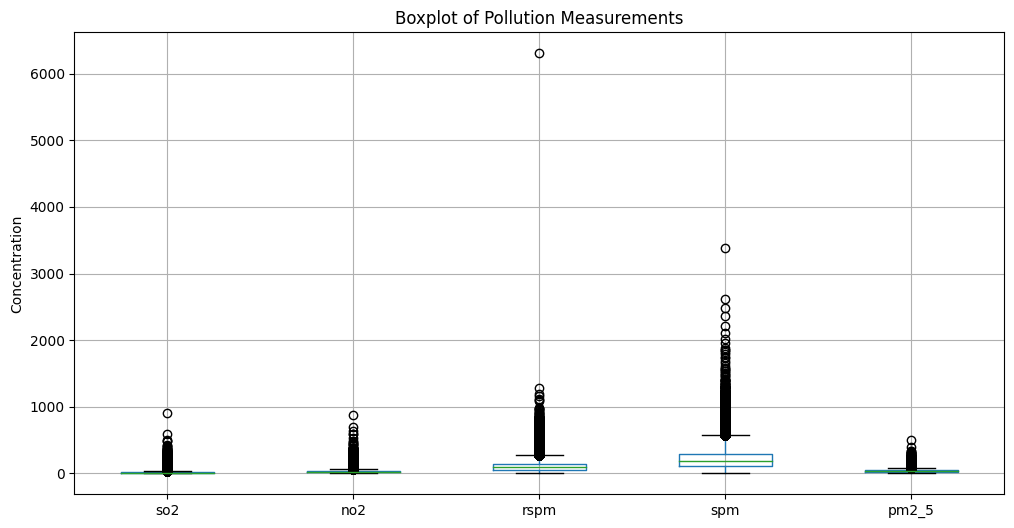

In [11]:
import matplotlib.pyplot as plt

# Create a boxplot for each numerical column to visualize outliers
plt.figure(figsize=(12, 6))
df[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].boxplot()
plt.title('Boxplot of Pollution Measurements')
plt.ylabel('Concentration')
plt.show()


In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame

# List of columns to check for non-negative values
pollution_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# Check for any negative values in these columns
invalid_values = {}
for column in pollution_columns:
    if column in df.columns:
        # Check if there are any negative values in the column
        invalid_entries = df[df[column] < 0]
        if not invalid_entries.empty:
            invalid_values[column] = invalid_entries

# Print out invalid values
if invalid_values:
    for column, data in invalid_values.items():
        print(f"Invalid entries in column '{column}':")
        print(data)
else:
    print("No invalid entries found in specified columns.")


No invalid entries found in specified columns.


### Data Visulation

The `sns.pairplot(data=df)` function from the Seaborn library is used to create a grid of scatter plots. Each plot represents a pairwise relationship between different variables in the DataFrame `df`. On the diagonal of the grid, histograms are shown for each variable, providing insights into the distribution of each variable within the dataset. This type of plot is especially useful for exploring correlations and distributions across multiple dimensions simultaneously, helping to quickly identify patterns, trends, and potential outliers in the data.


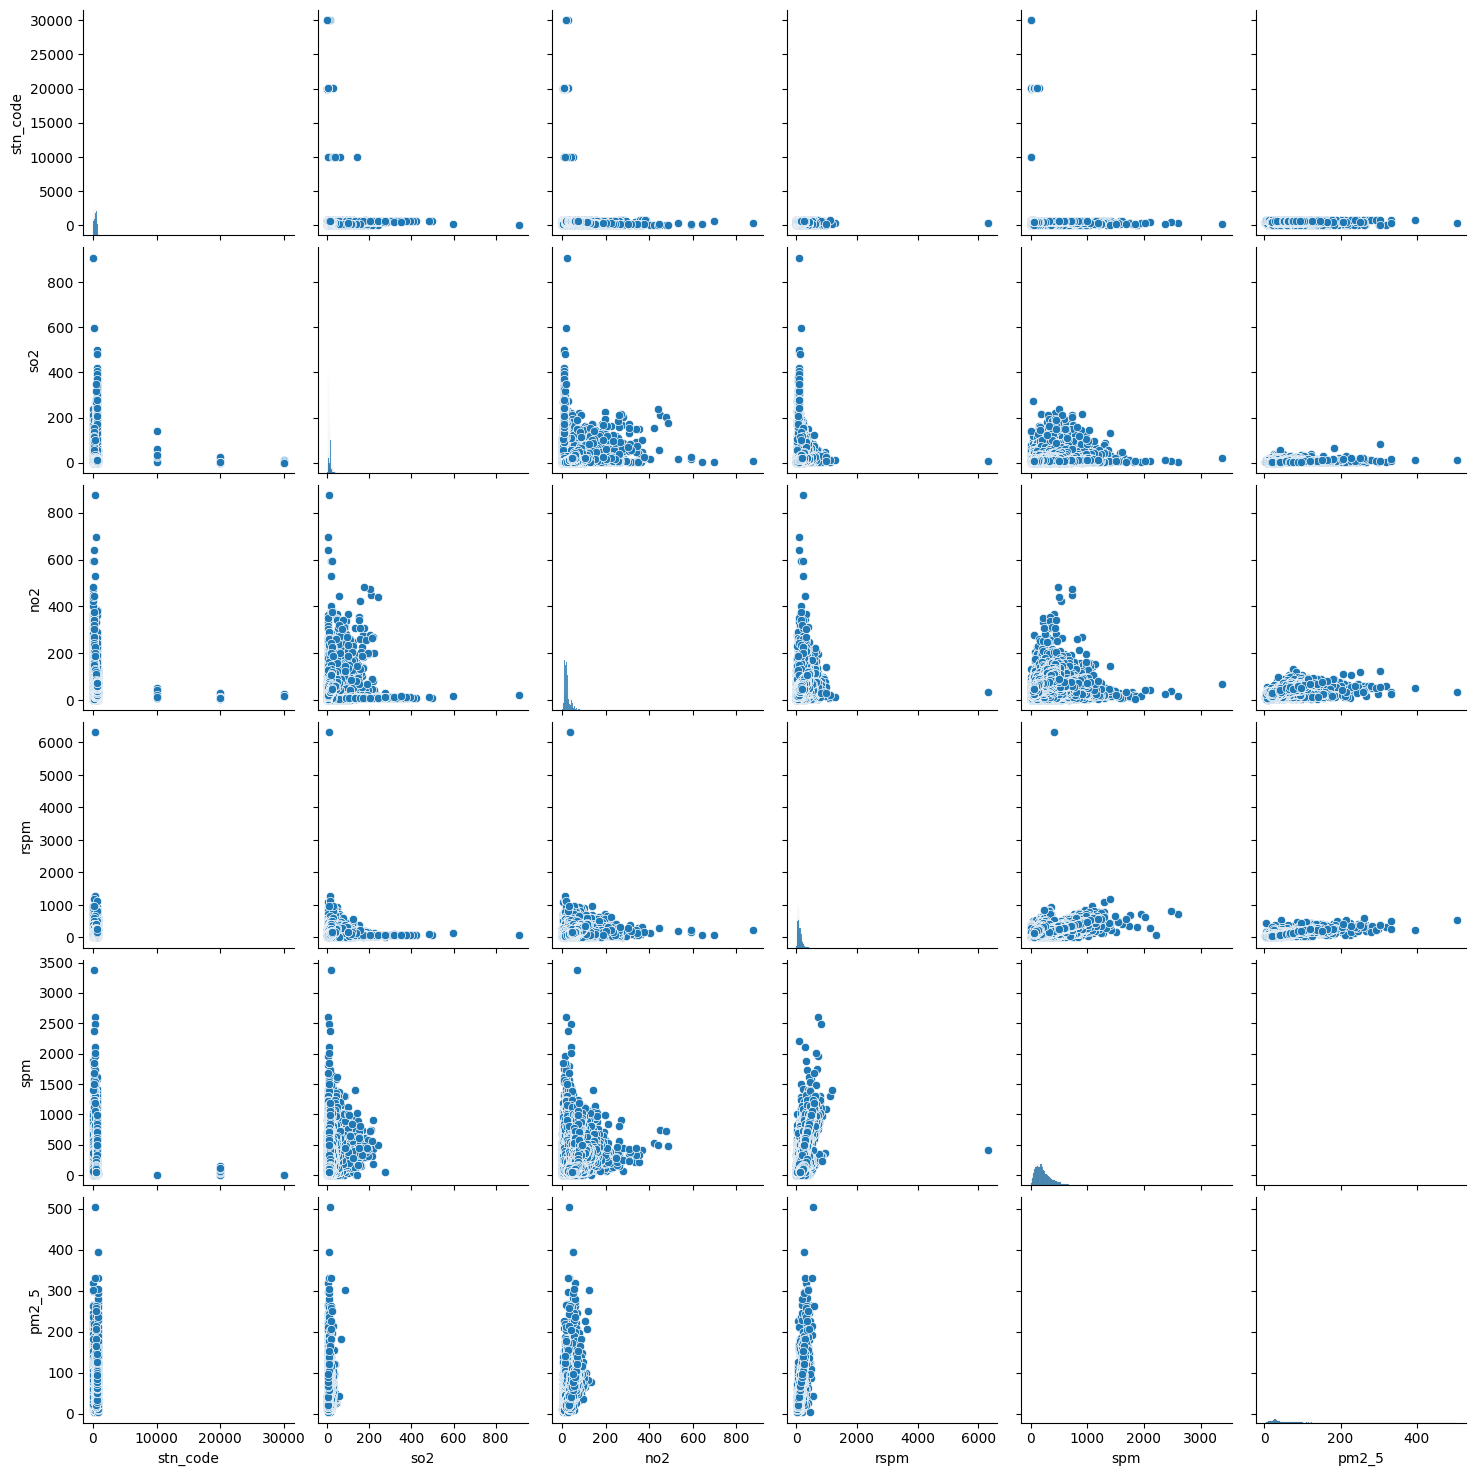

In [59]:
sns.pairplot(data=df)

### Pairplot Analysis

The pairplot visualization provides an extensive overview of the relationships between multiple variables related to pollution levels, including SO2, NO2, RSPM, SPM, and PM2.5, along with station codes. The diagonal histograms offer insights into the distribution of each variable, revealing patterns and potential outliers. Key observations include:

- **SO2 and NO2** show some degree of positive correlation, indicated by the trend of increasing values of NO2 with higher values of SO2.
- **RSPM (Respirable Suspended Particulate Matter)** shows a wide range of values with some extreme outliers, suggesting areas with significantly poor air quality or potential data errors.
- **SPM (Suspended Particulate Matter)** and **PM2.5** also display a spread of values but with fewer extreme outliers compared to RSPM.
- The distribution plots (histograms) on the diagonal indicate that most pollutants have skewed distributions, with a majority of observations clustered at lower concentration levels but with some extreme higher values.

This analysis suggests areas where air quality interventions may be needed and highlights data quality issues that may require further investigation, such as the presence of extreme outliers in particulate matter measurements.


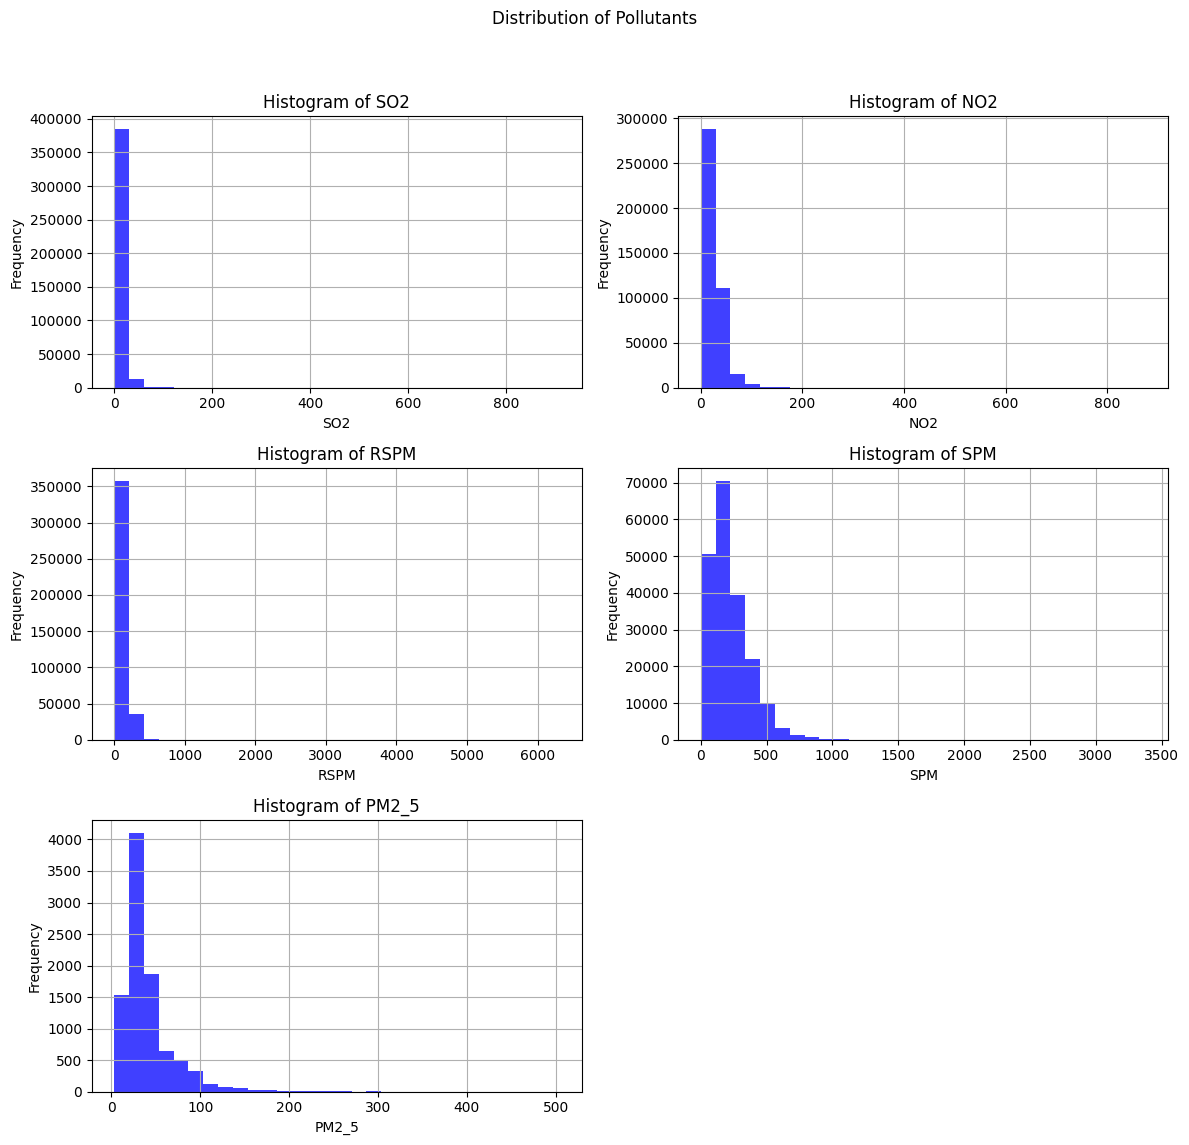

In [60]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

variables = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']  # List of variables to plot

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Pollutants')  # Title for the entire figure

# Flatten the array of axes
axes = axes.flatten()

# Loop through the variables and plot on respective axes
for i, var in enumerate(variables):
    axes[i].hist(df[var].dropna(), bins=30, alpha=0.75, color='blue')
    axes[i].set_title(f'Histogram of {var.upper()}')
    axes[i].set_xlabel(var.upper())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# If there's an extra subplot, hide it
if len(variables) < len(axes):
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots and add space for the main title
plt.show()


### Histogram Interpretations

#### Histogram of SO2
- **Highly Skewed Distribution**: The histogram of SO2 is skewed heavily towards lower values, indicating that most observations have low sulfur dioxide levels.
- **Low Pollution Levels**: The concentration of SO2 predominantly ranges close to zero, suggesting effective control or low emission sources in the sampled areas.

#### Histogram of NO2
- **Moderately Skewed Distribution**: This histogram shows that NO2 levels are generally low but have a wider spread than SO2, extending towards higher values.
- **Potential Hotspots**: Some higher values suggest there may be hotspots of NO2 pollution which could be explored further.

#### Histogram of RSPM
- **High Frequency of Lower Values**: Most of the RSPM measurements are concentrated at lower levels, but there is a significant tail extending to very high values.
- **Concern for Air Quality**: The presence of higher RSPM values, although fewer, points to occasional but significant air quality degradation.

#### Histogram of SPM
- **Broad Distribution**: The SPM histogram shows a more evenly distributed range of values up to about 500, beyond which it tapers off.
- **Diverse Source Impact**: The spread of SPM values indicates varying impacts from different sources, possibly including both industrial and natural contributors.

#### Histogram of PM2_5
- **Concentrated Low Values with Tail**: The PM2.5 distribution is mostly concentrated at lower values with a long tail extending to higher concentrations.
- **Occasional High Pollution Events**: The long tail suggests that while most of the time PM2.5 is under control, there are episodes where it reaches unhealthy levels.

These histograms provide valuable insights into the distribution and concentration of various pollutants in the environment, highlighting areas and instances of concern that may require targeted interventions or further investigation.


In [61]:
df['state'].value_counts()

state
Maharashtra                    60286
Uttar Pradesh                  42775
Andhra Pradesh                 26158
Punjab                         25634
Rajasthan                      25566
Kerala                         24591
Himachal Pradesh               22883
West Bengal                    22453
Gujarat                        21238
Tamil Nadu                     20585
Madhya Pradesh                 19910
Assam                          19358
Odisha                         19270
Karnataka                      17099
Delhi                           8549
Chandigarh                      8514
Chhattisgarh                    7831
Goa                             6204
Jharkhand                       5968
Mizoram                         5336
Telangana                       3978
Meghalaya                       3853
Puducherry                      3779
Haryana                         3415
Nagaland                        2463
Bihar                           2265
Uttarakhand                     

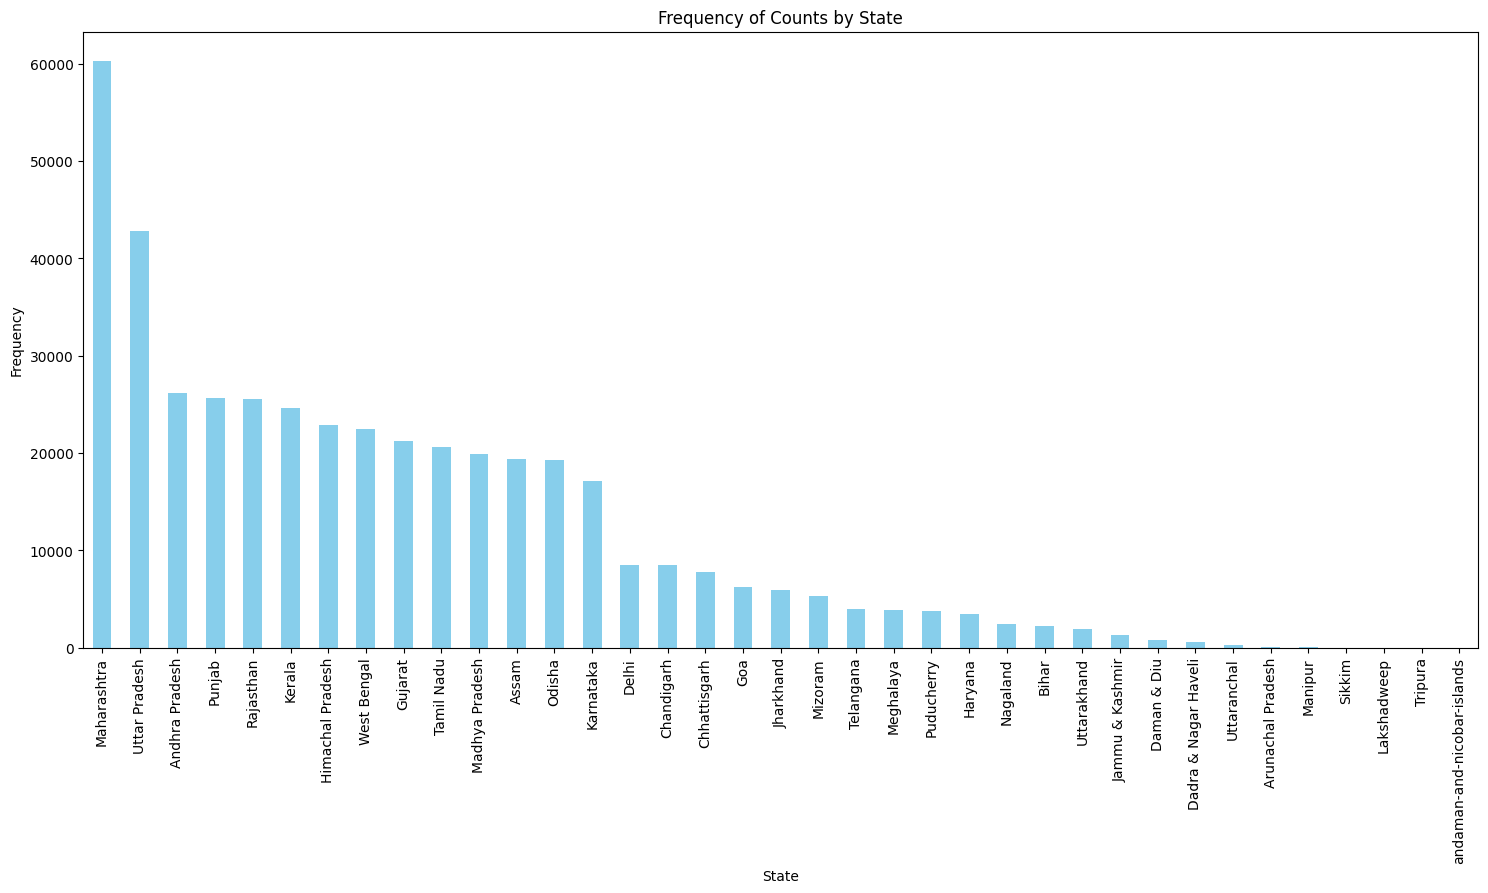

In [63]:
all_states = [
    "Maharashtra", "Uttar Pradesh", "Andhra Pradesh", "Punjab", "Rajasthan", 
    "Kerala", "Himachal Pradesh", "West Bengal", "Gujarat", "Tamil Nadu", 
    "Madhya Pradesh", "Assam", "Odisha", "Karnataka", "Delhi", "Chandigarh", 
    "Chhattisgarh", "Goa", "Jharkhand", "Mizoram", "Telangana", "Meghalaya", 
    "Puducherry", "Haryana", "Nagaland", "Bihar", "Uttarakhand", "Jammu & Kashmir", 
    "Daman & Diu", "Dadra & Nagar Haveli", "Uttaranchal", "Arunachal Pradesh", 
    "Manipur", "Sikkim", "Lakshadweep", "Tripura", "andaman-and-nicobar-islands"
]


state_counts = df['state'].value_counts()
state_counts = state_counts.reindex(all_states, fill_value=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Frequency of Counts by State')
plt.show()


In [64]:
df['type'].value_counts()
# Viewing the count of values present in the type column

type
Residential, Rural and other Areas    178608
Industrial Area                        95988
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8856
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                490
Industrial                               233
Residential                              158
Name: count, dtype: int64

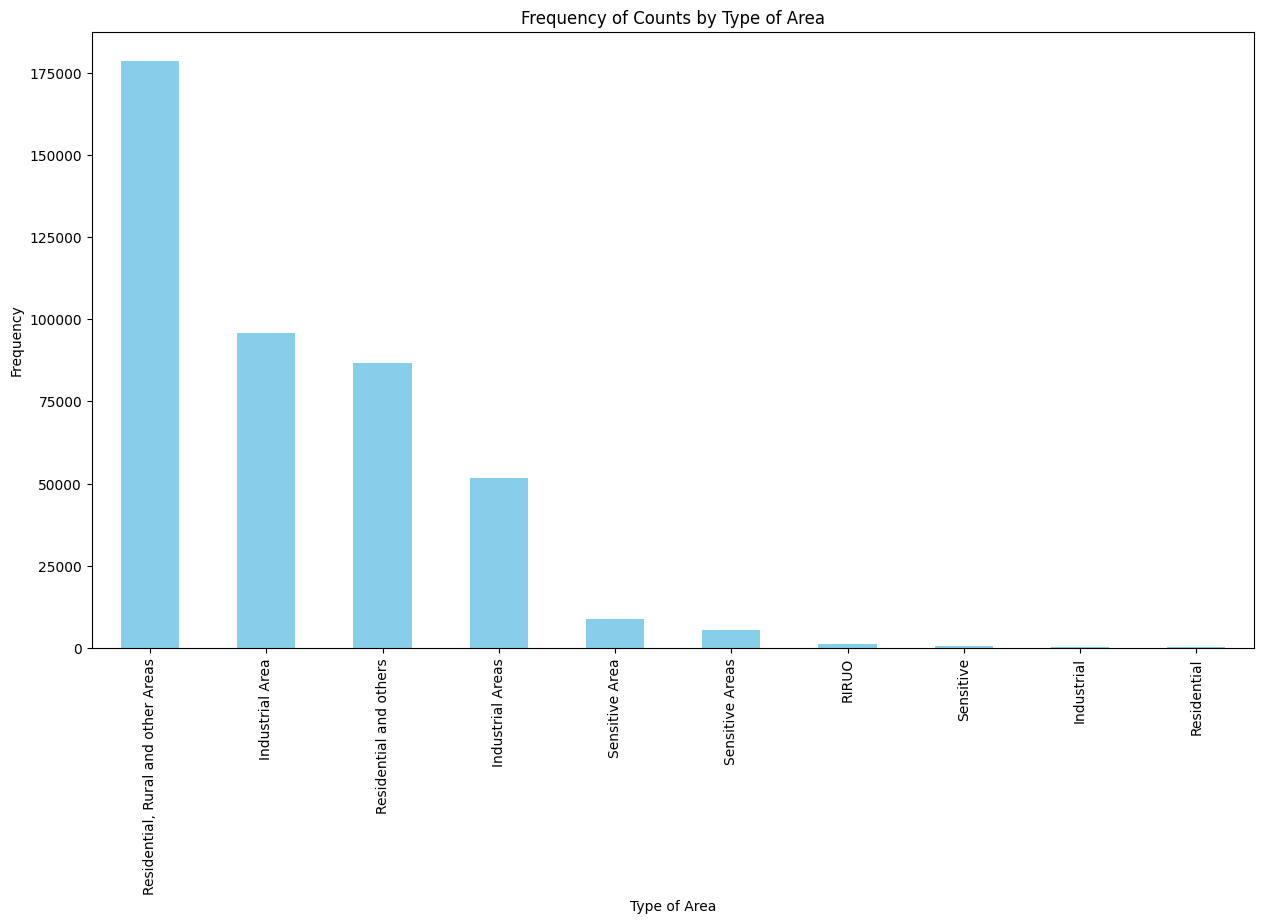

In [66]:
all_types = [
    "Residential, Rural and other Areas", "Industrial Area", "Residential and others",
    "Industrial Areas", "Sensitive Area", "Sensitive Areas", "RIRUO", "Sensitive",
    "Industrial", "Residential"
]

type_counts = df['type'].value_counts()
type_counts = type_counts.reindex(all_types, fill_value=0)


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Adjust the figure size as necessary
type_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.xlabel('Type of Area')
plt.ylabel('Frequency')
plt.title('Frequency of Counts by Type of Area')
plt.show()


In [68]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

agency
Maharashtra State Pollution Control Board                                 27771
Uttar Pradesh State Pollution Control Board                               22666
Andhra Pradesh State Pollution Control Board                              18932
Himachal Pradesh State Environment Proection & Pollution Control Board    15276
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         79
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         52
Name: count, Length: 64, dtype: int64

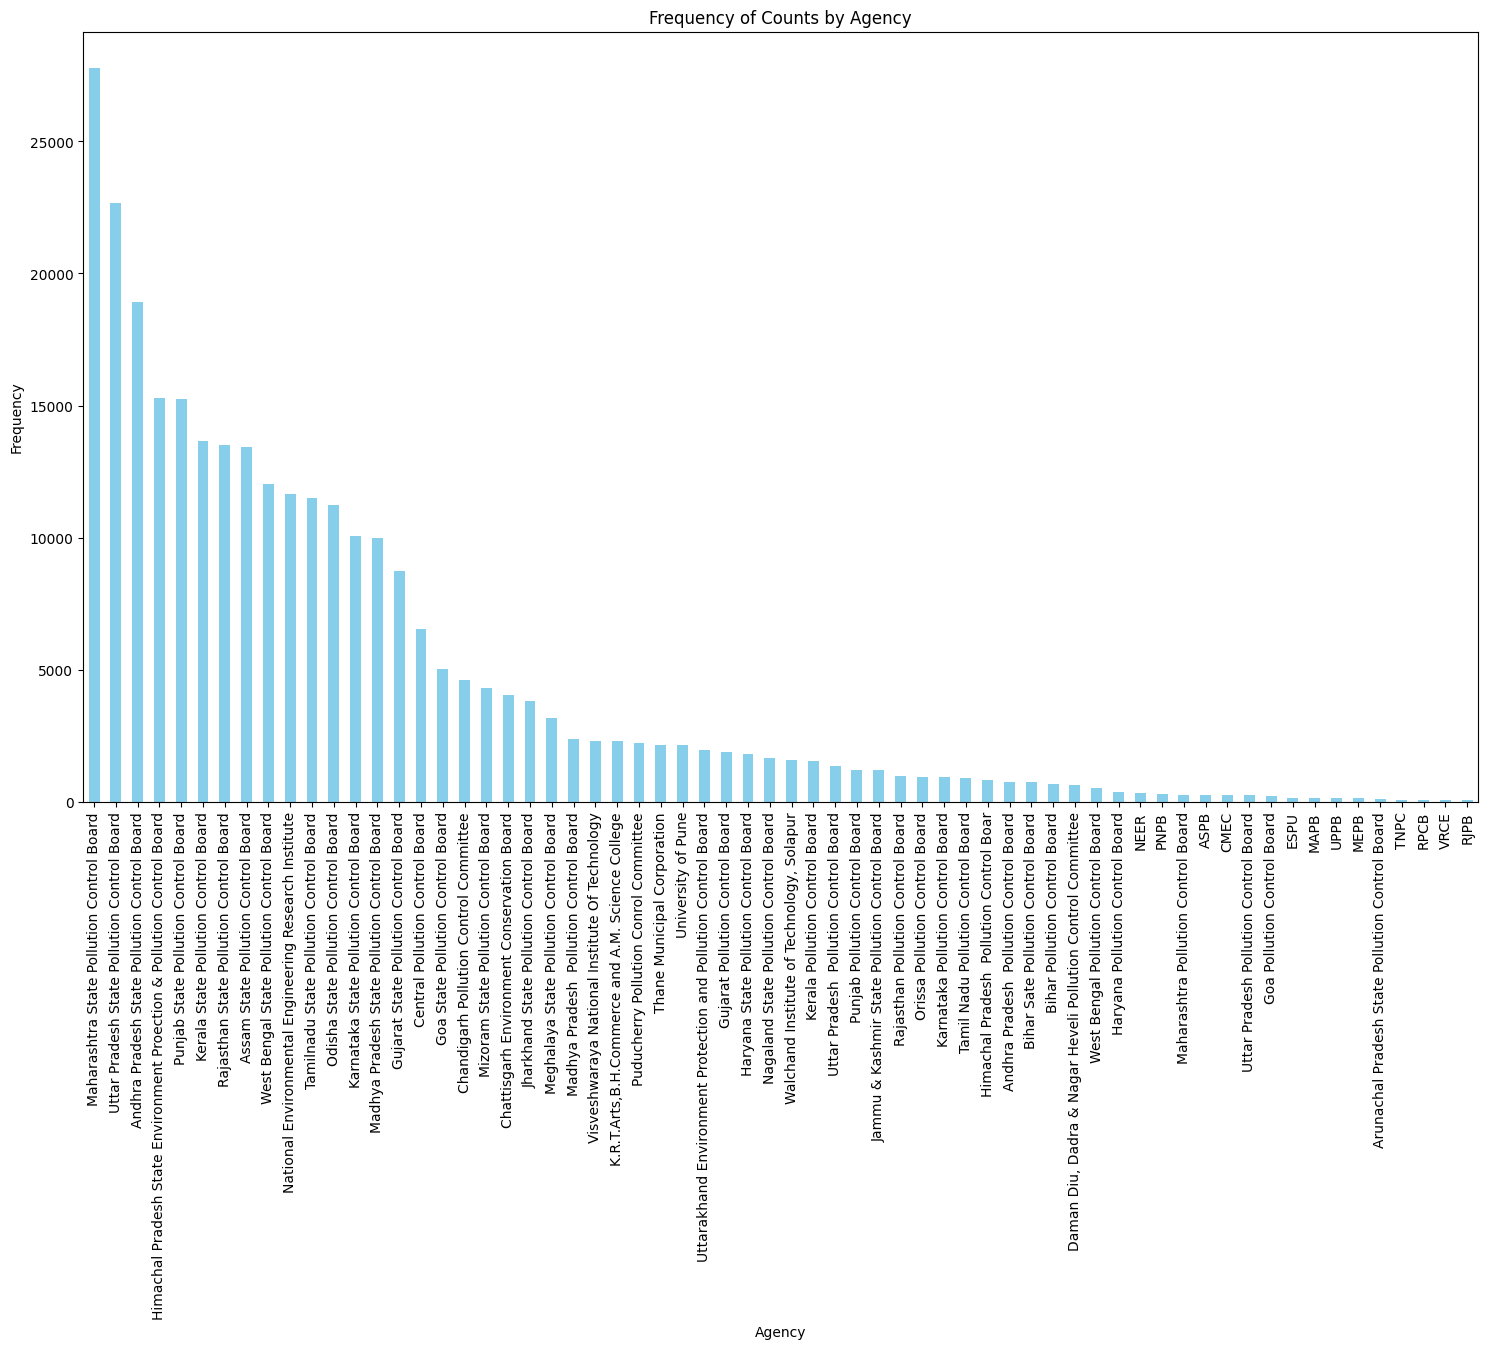

In [69]:
agency_counts = df['agency'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))  # Adjust the figure size as necessary
agency_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.xlabel('Agency')
plt.ylabel('Frequency')
plt.title('Frequency of Counts by Agency')
plt.show()


### Relationship between State and air quality parameters

### Air Pollution Parameters Description

1. **SO2 (Sulphur Dioxide)**
   - **Description**: SO2 is a gas mainly produced by volcanic eruptions and industrial activities, particularly from burning coal and oil at power plants and from oil refining.
   - **Impact**: It can cause respiratory problems and heart diseases, and contributes to the formation of acid rain.
   - **Air Quality Indicator**: Lower levels indicate healthier air quality; higher levels suggest increased pollution and health risks.

2. **NO2 (Nitrogen Dioxide)**
   - **Description**: NO2 is a reddish-brown gas coming from vehicle exhausts, power plants, and industrial equipment.
   - **Impact**: It exacerbates respiratory diseases and contributes to smog and acid rain formation.
   - **Air Quality Indicator**: Lower NO2 concentrations are associated with cleaner air, while higher concentrations indicate poorer air quality and increased health risks.

3. **RSPM (Respirable Suspended Particulate Matter)**
   - **Description**: RSPM consists of very small particles that are capable of being inhaled into the lungs.
   - **Impact**: These particles are linked to a variety of health issues, including respiratory and heart diseases, and can decrease lung function.
   - **Air Quality Indicator**: Lower levels signify cleaner air; higher levels show poor air quality and heightened public health risks.

4. **PM2.5 (Particulate Matter less than 2.5 micrometers)**
   - **Description**: PM2.5 refers to fine particles smaller than 2.5 micrometers in diameter, often produced by combustion, including motor vehicles, power plants, and residential burning.
   - **Impact**: Due to their small size, they can penetrate deep into the lungs and even enter the bloodstream, causing cardiovascular, respiratory, and other health problems.
   - **Air Quality Indicator**: Lower PM2.5 levels are indicative of better air quality, whereas higher levels are associated with significant health risks and poor air quality.

### Summary

In essence, the presence of lower concentrations of these air pollutants (SO2, NO2, RSPM, PM2.5) typically indicates healthier air quality. Conversely, higher levels denote increased pollution and correspond with greater adverse health effects. Monitoring these parameters is crucial for public health and environmental protection.



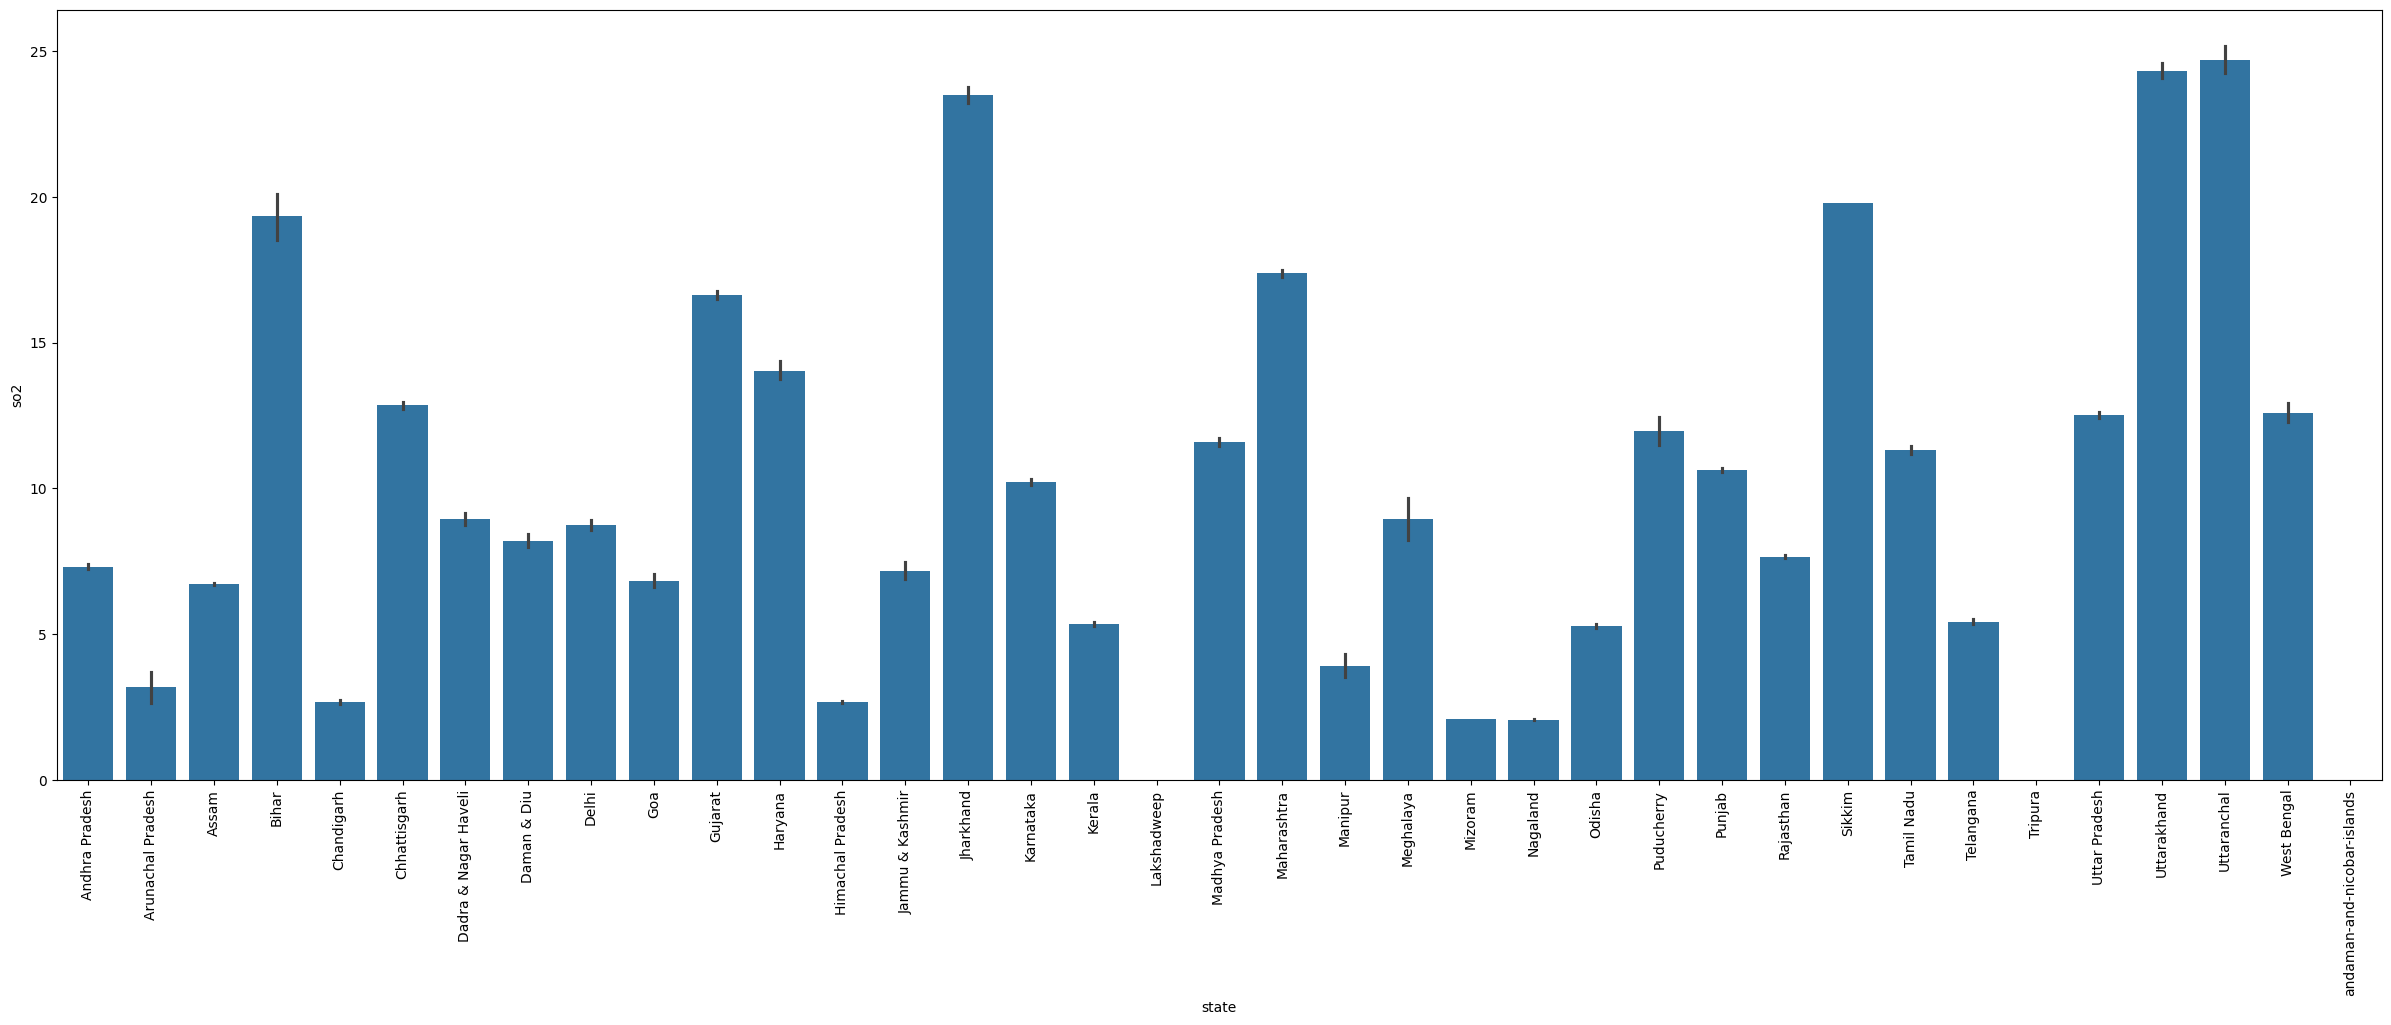

In [70]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

### Interpretation of SO2 Levels by State

The bar plot visualizes the average Sulphur Dioxide (SO2) concentrations across various states. Here are the key insights:

- **High SO2 Concentrations**: States like Uttar Pradesh, Maharashtra, and West Bengal exhibit higher average levels of SO2, which might be indicative of industrial activity, heavy vehicular traffic, or other urban emissions.
- **Lower SO2 Concentrations**: States such as Sikkim, Nagaland, and Manipur show notably lower SO2 levels, suggesting fewer sources of SO2 emissions, possibly due to lesser industrial activities or lower population density.
- **Environmental and Health Implications**: The varying levels of SO2 across states suggest differing environmental and health impacts, with higher levels potentially leading to more severe air pollution issues, including respiratory problems and acid rain.
- **Policy Focus**: This visual data can aid policymakers in identifying pollution hotspots and crafting targeted environmental regulations to mitigate SO2 emissions effectively.

This chart serves as a crucial tool for understanding regional air quality challenges and guiding appropriate environmental health interventions.


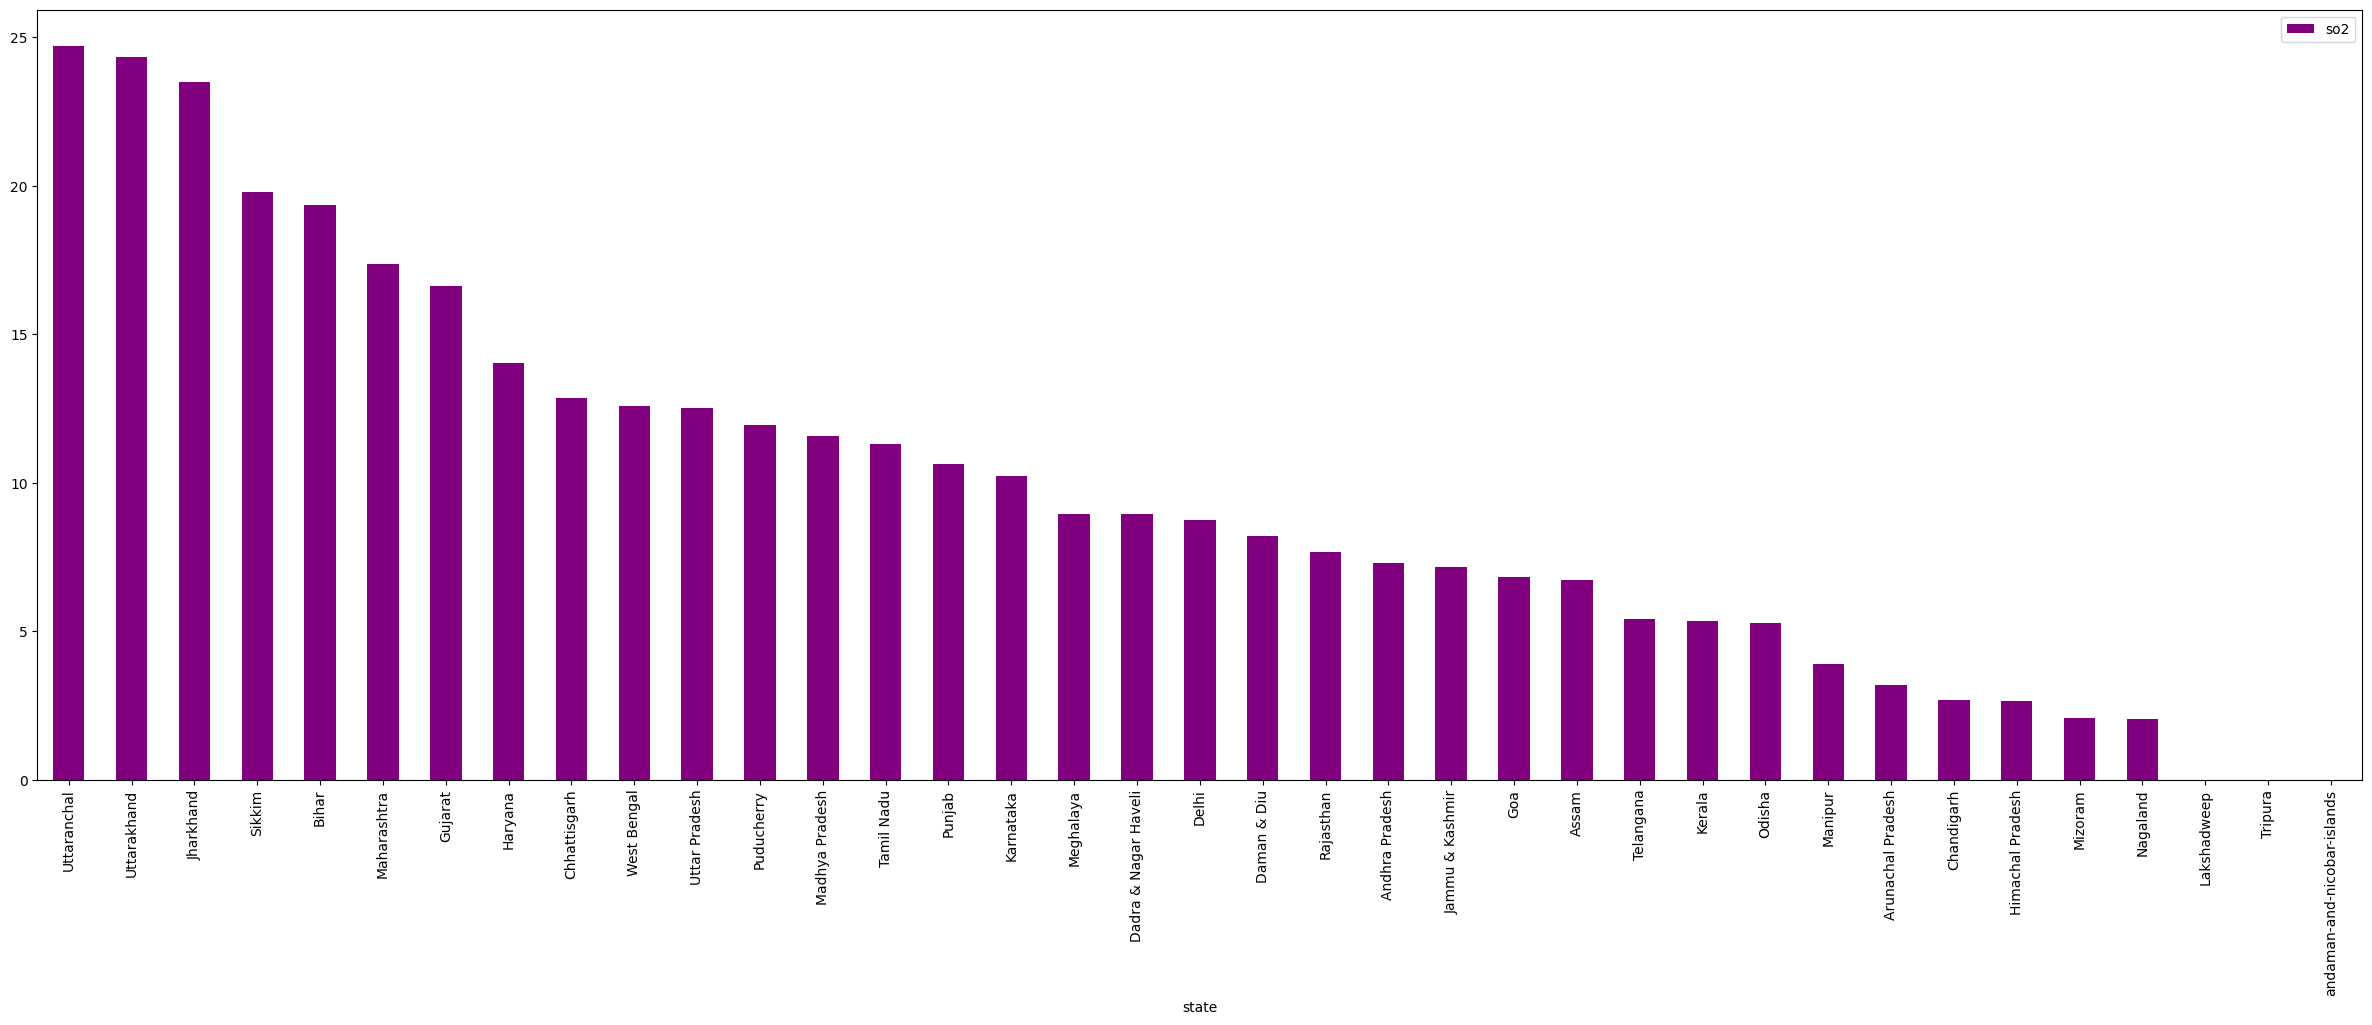

In [85]:
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2', ascending=False).plot.bar(color='purple')
plt.show()

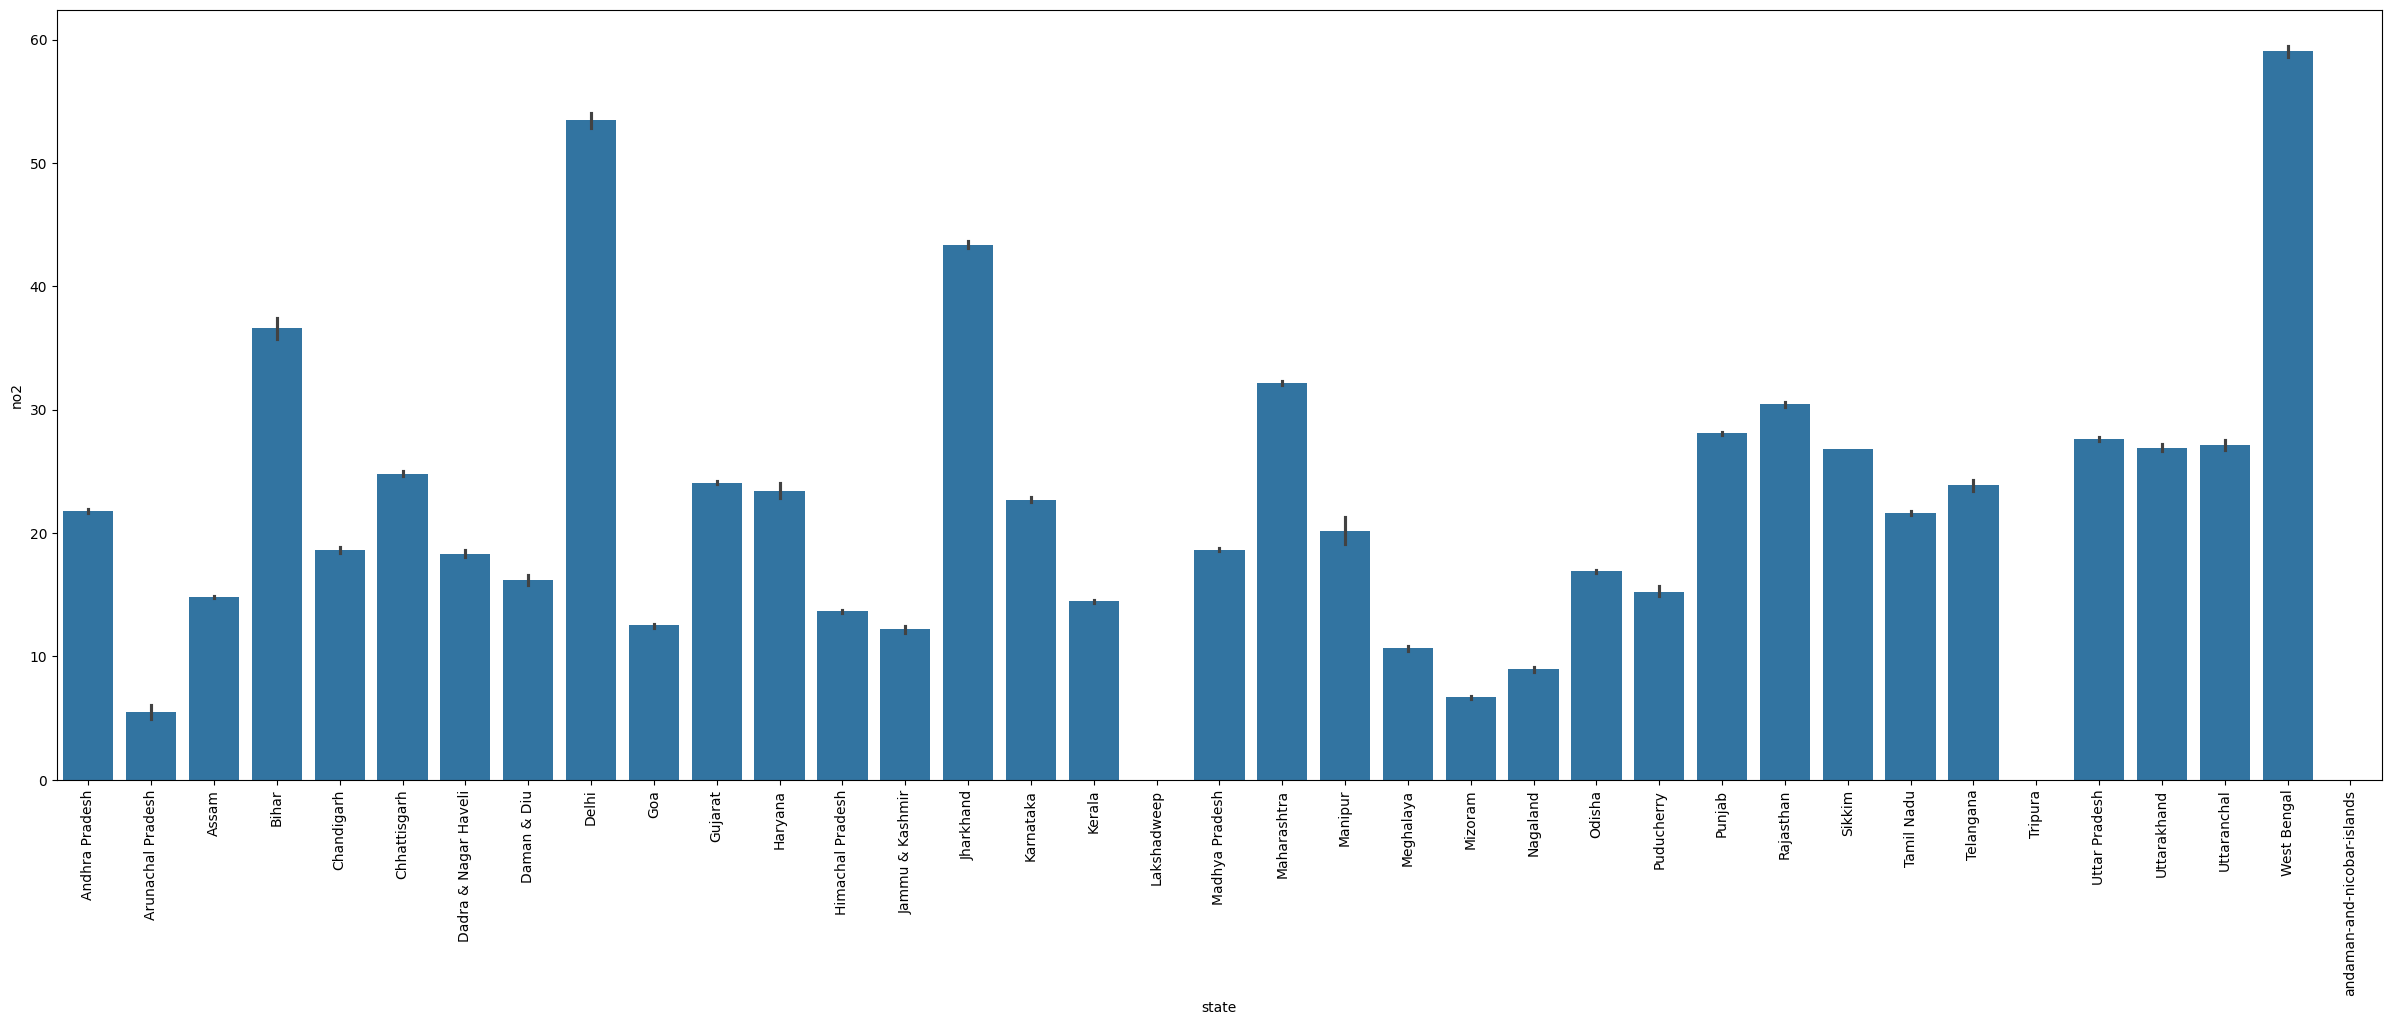

In [75]:
plt.rcParams['figure.figsize']=(30,10)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states

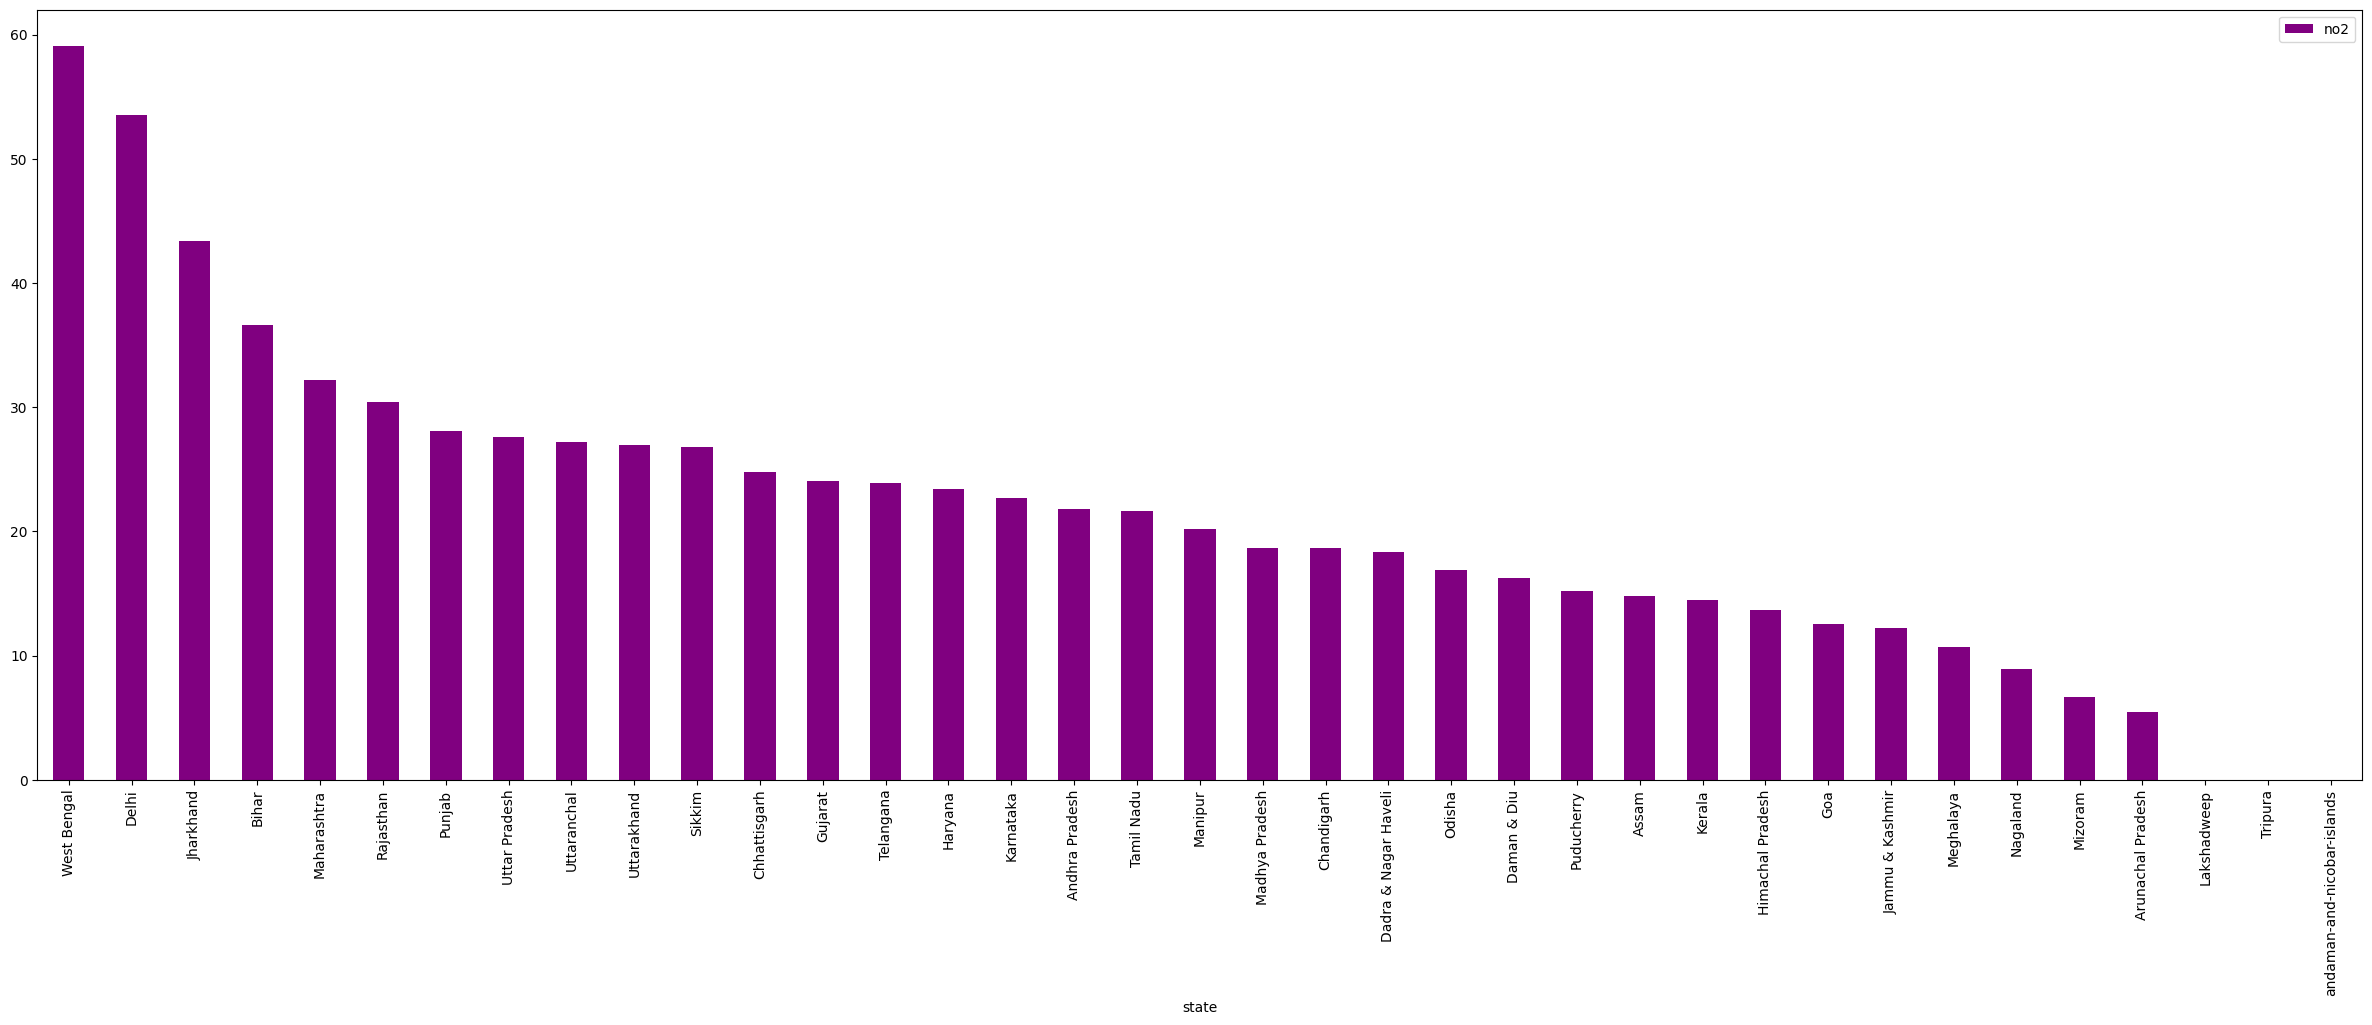

In [86]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2',ascending=False).plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

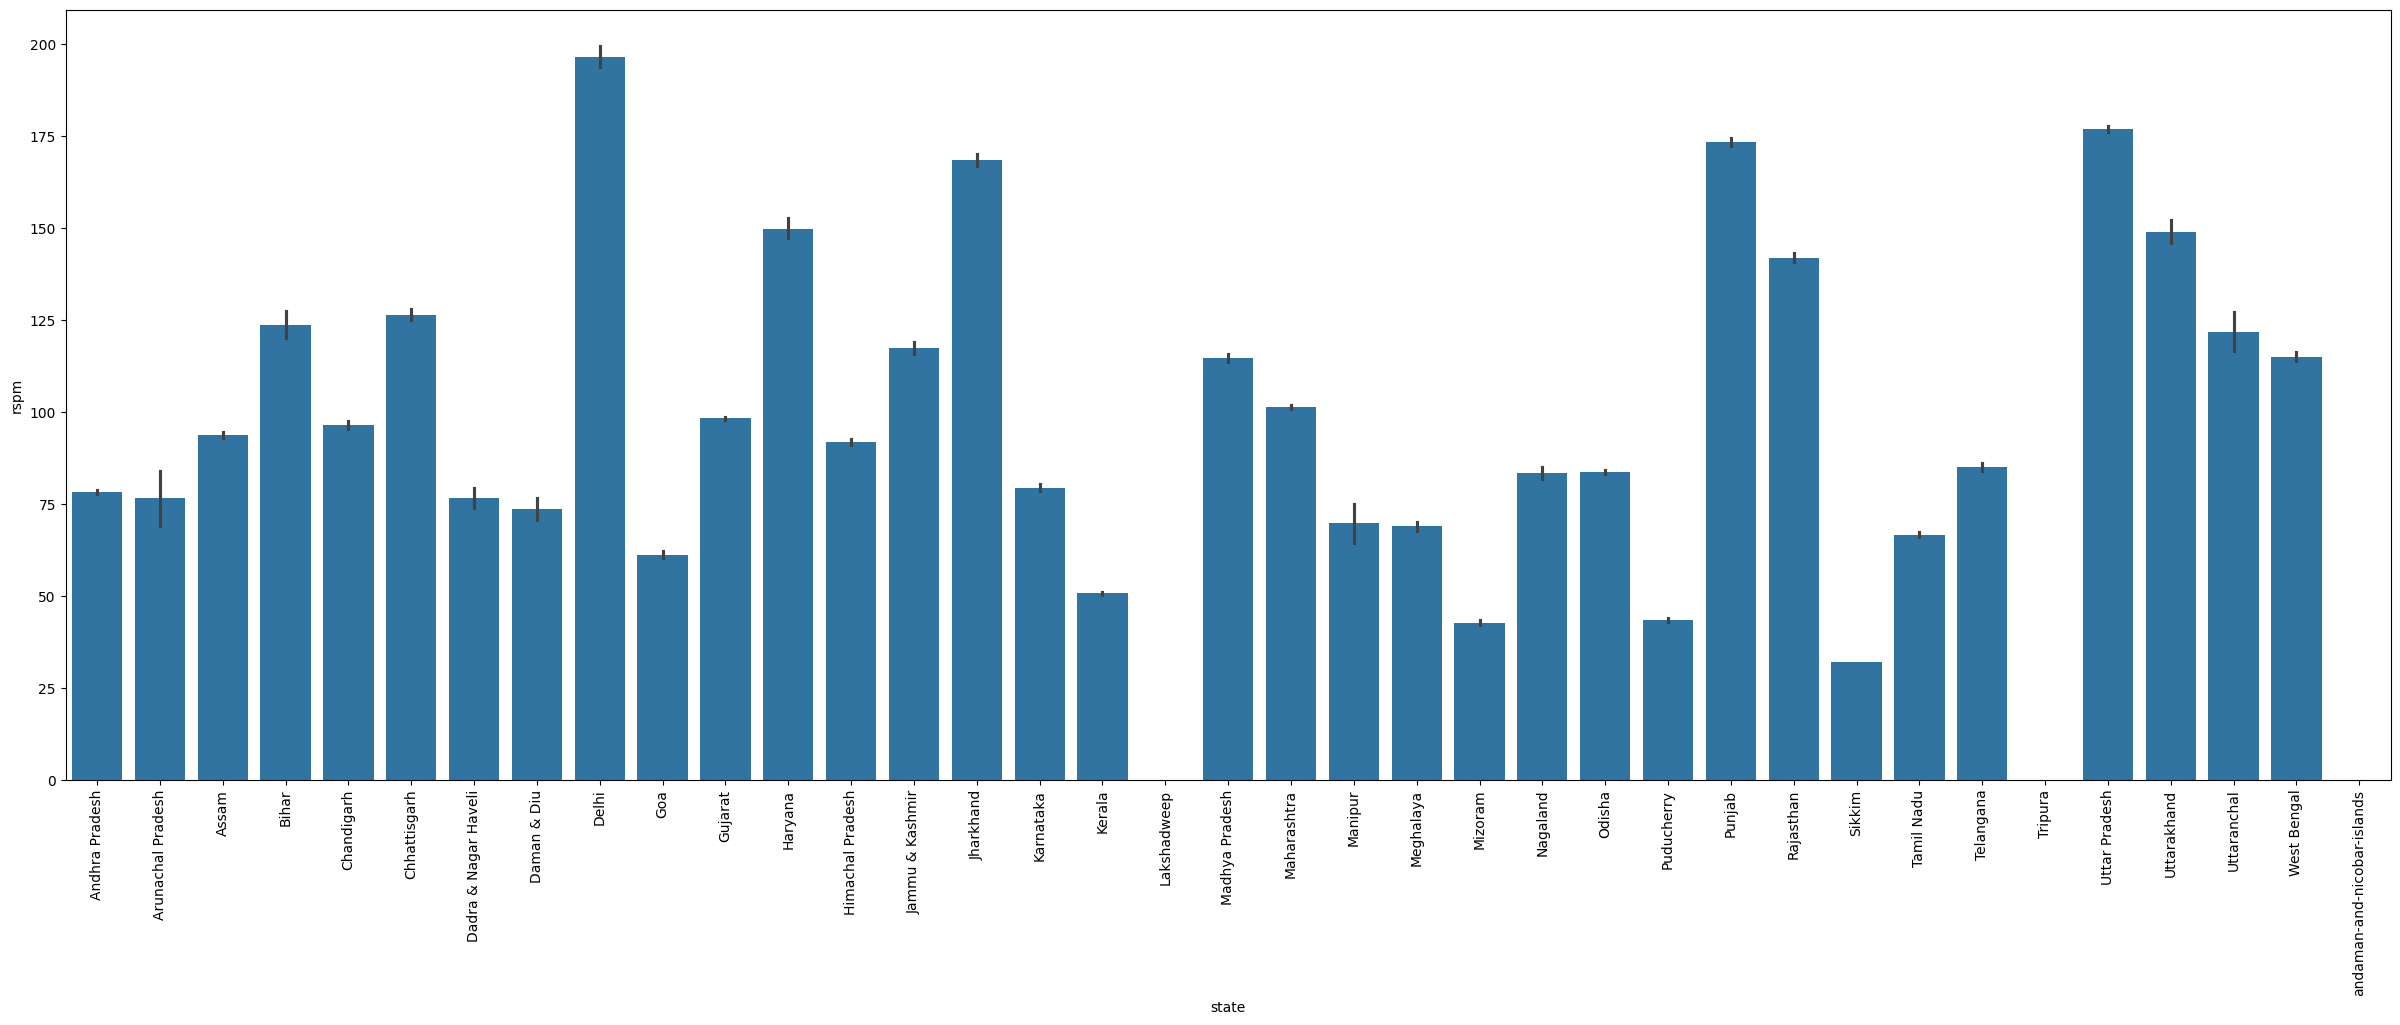

In [77]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

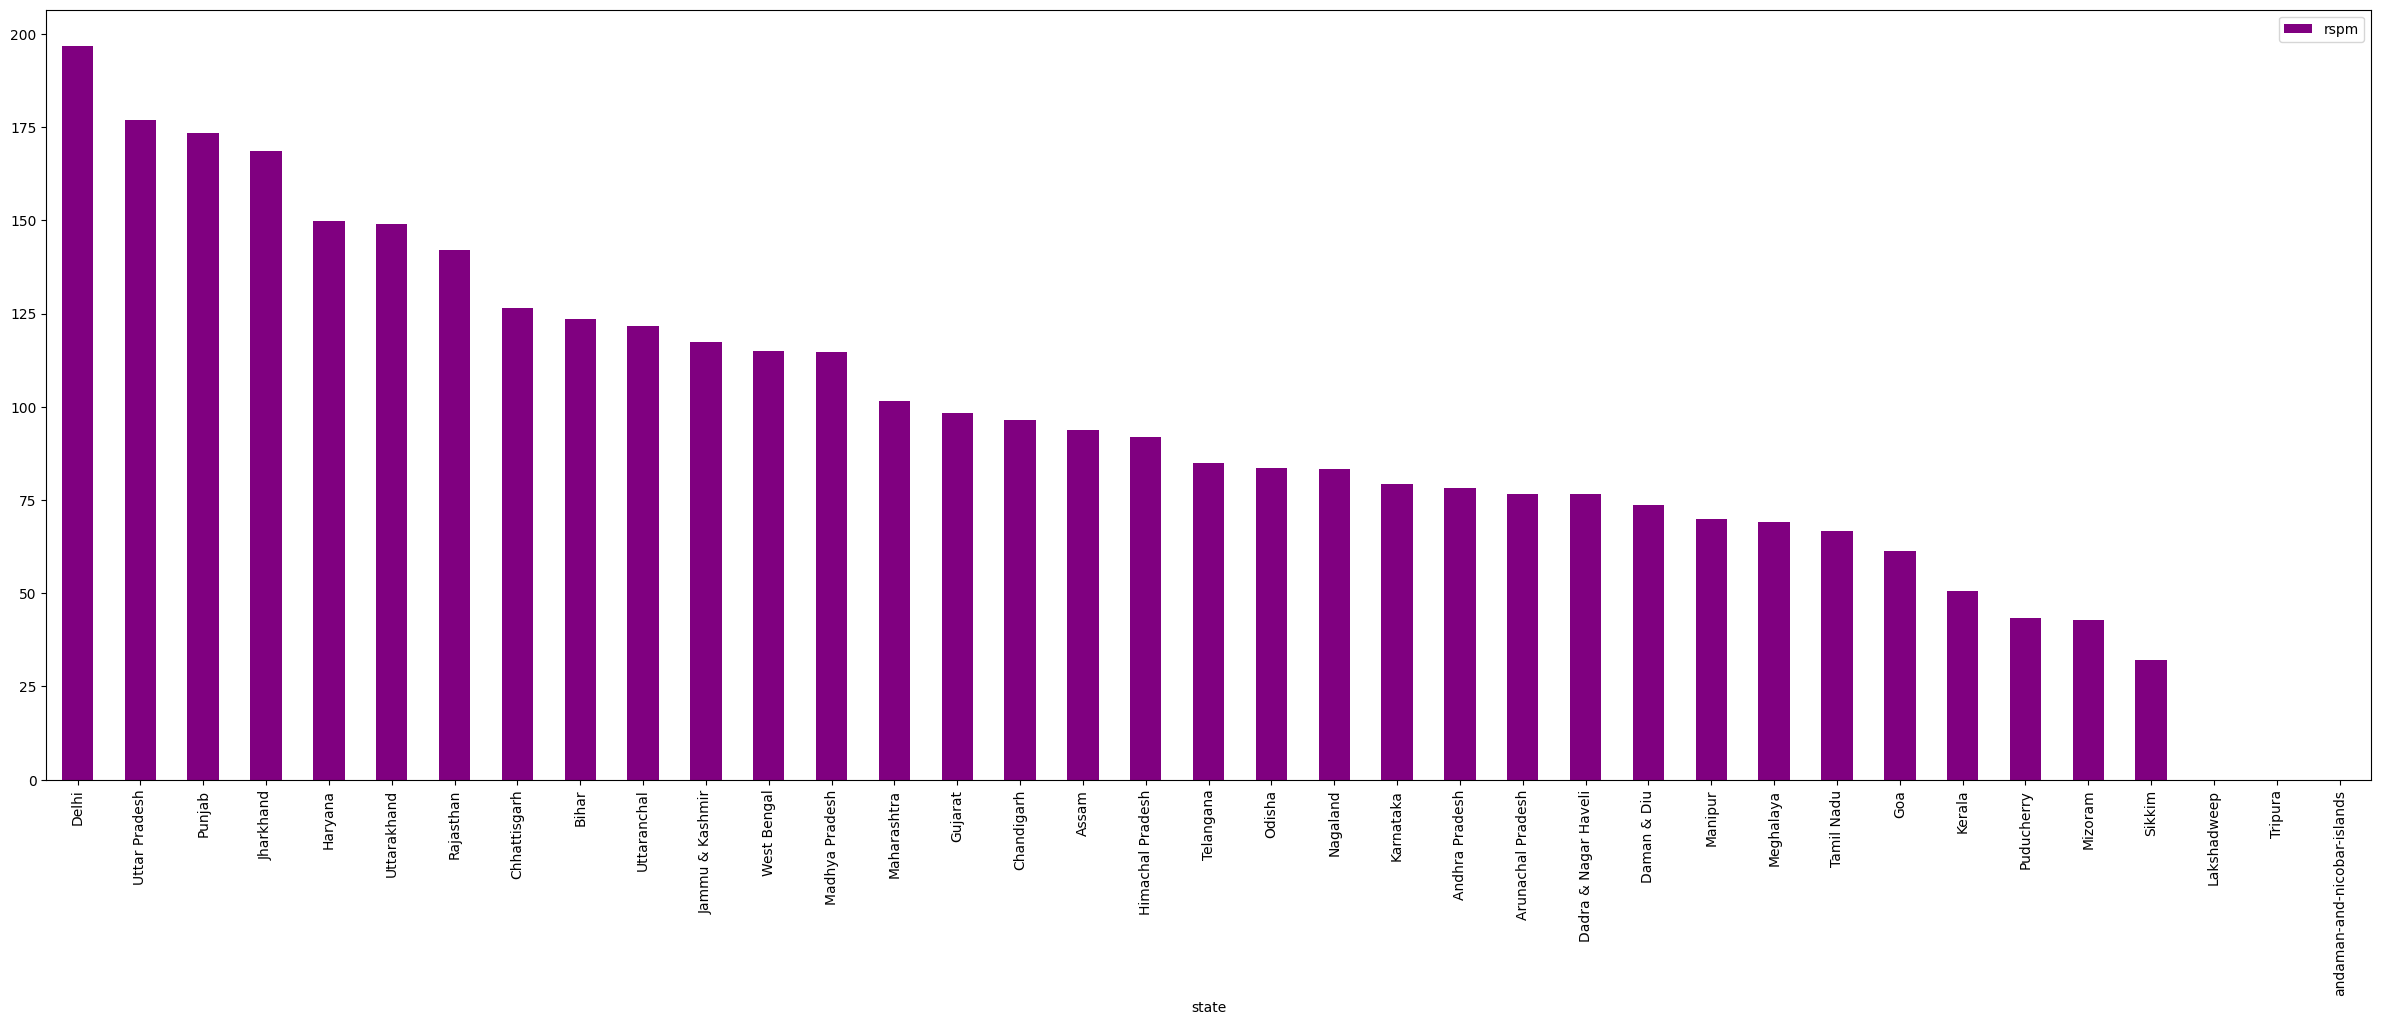

In [87]:
df[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm', ascending=False).plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

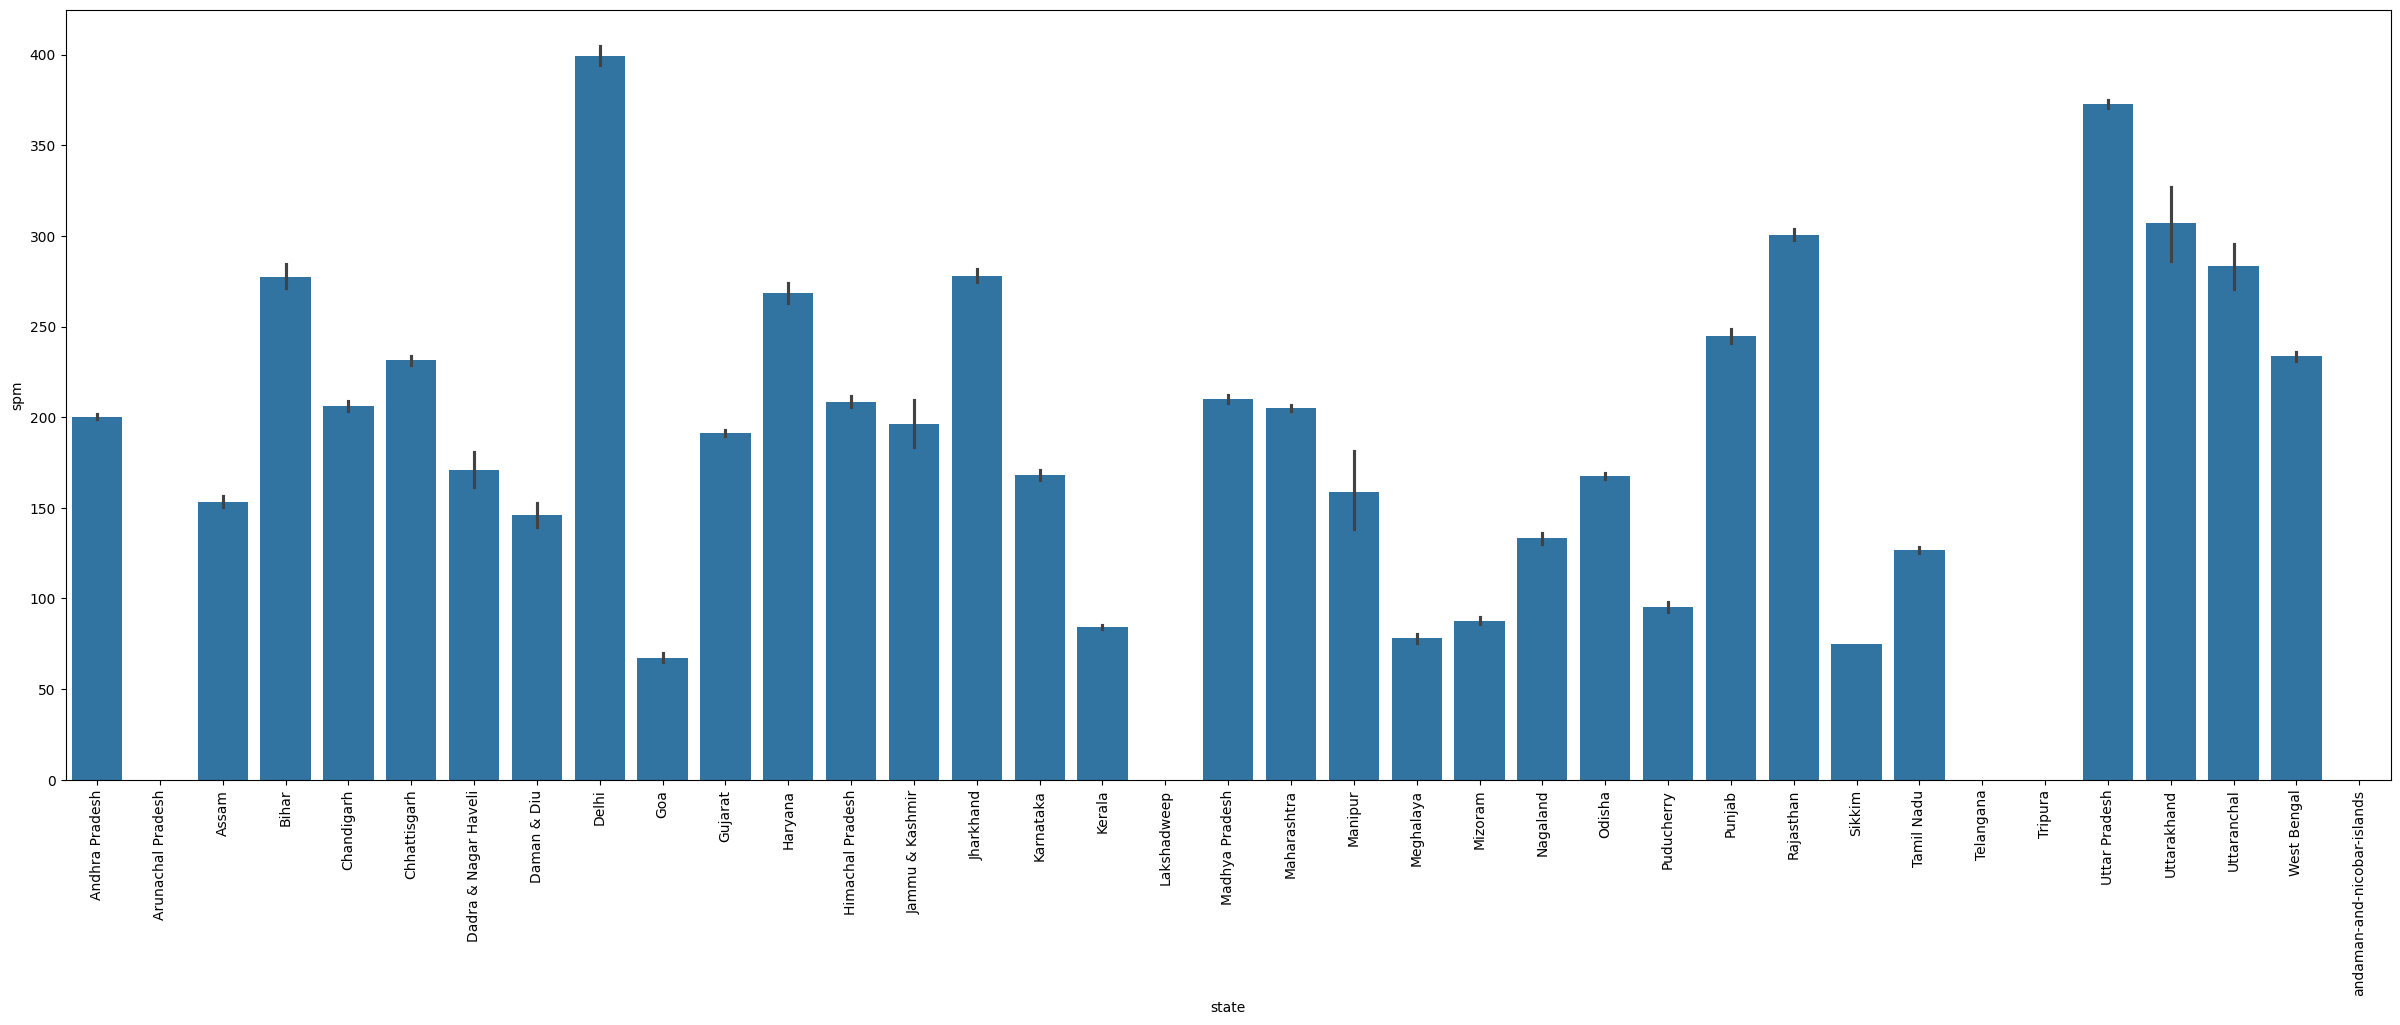

In [79]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states 

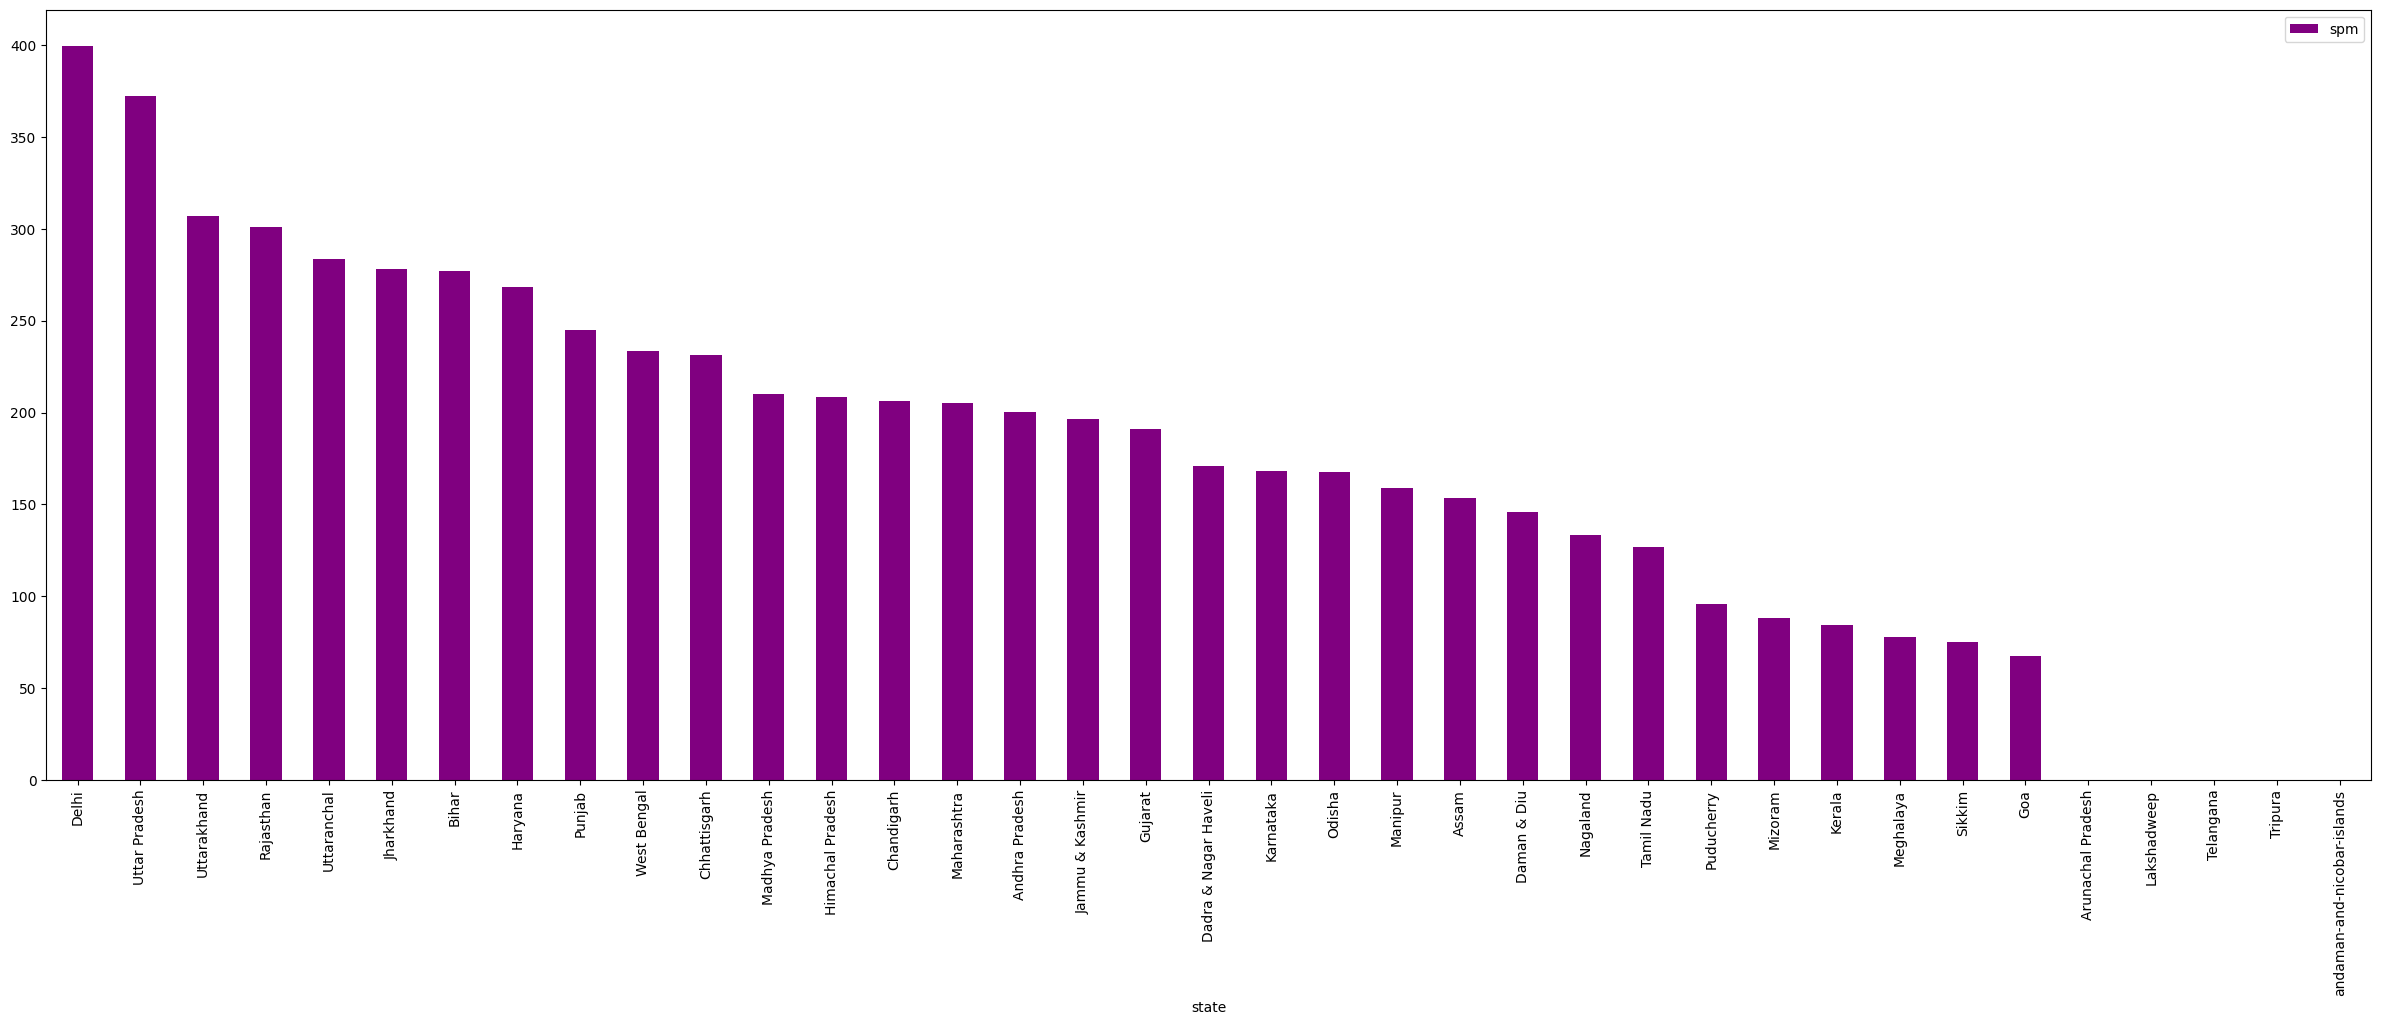

In [88]:
df[['spm','state']].groupby(["state"]).mean().sort_values(by='spm', ascending=False).plot.bar(color='purple')
plt.show()

<Axes: xlabel='state', ylabel='pm2_5'>

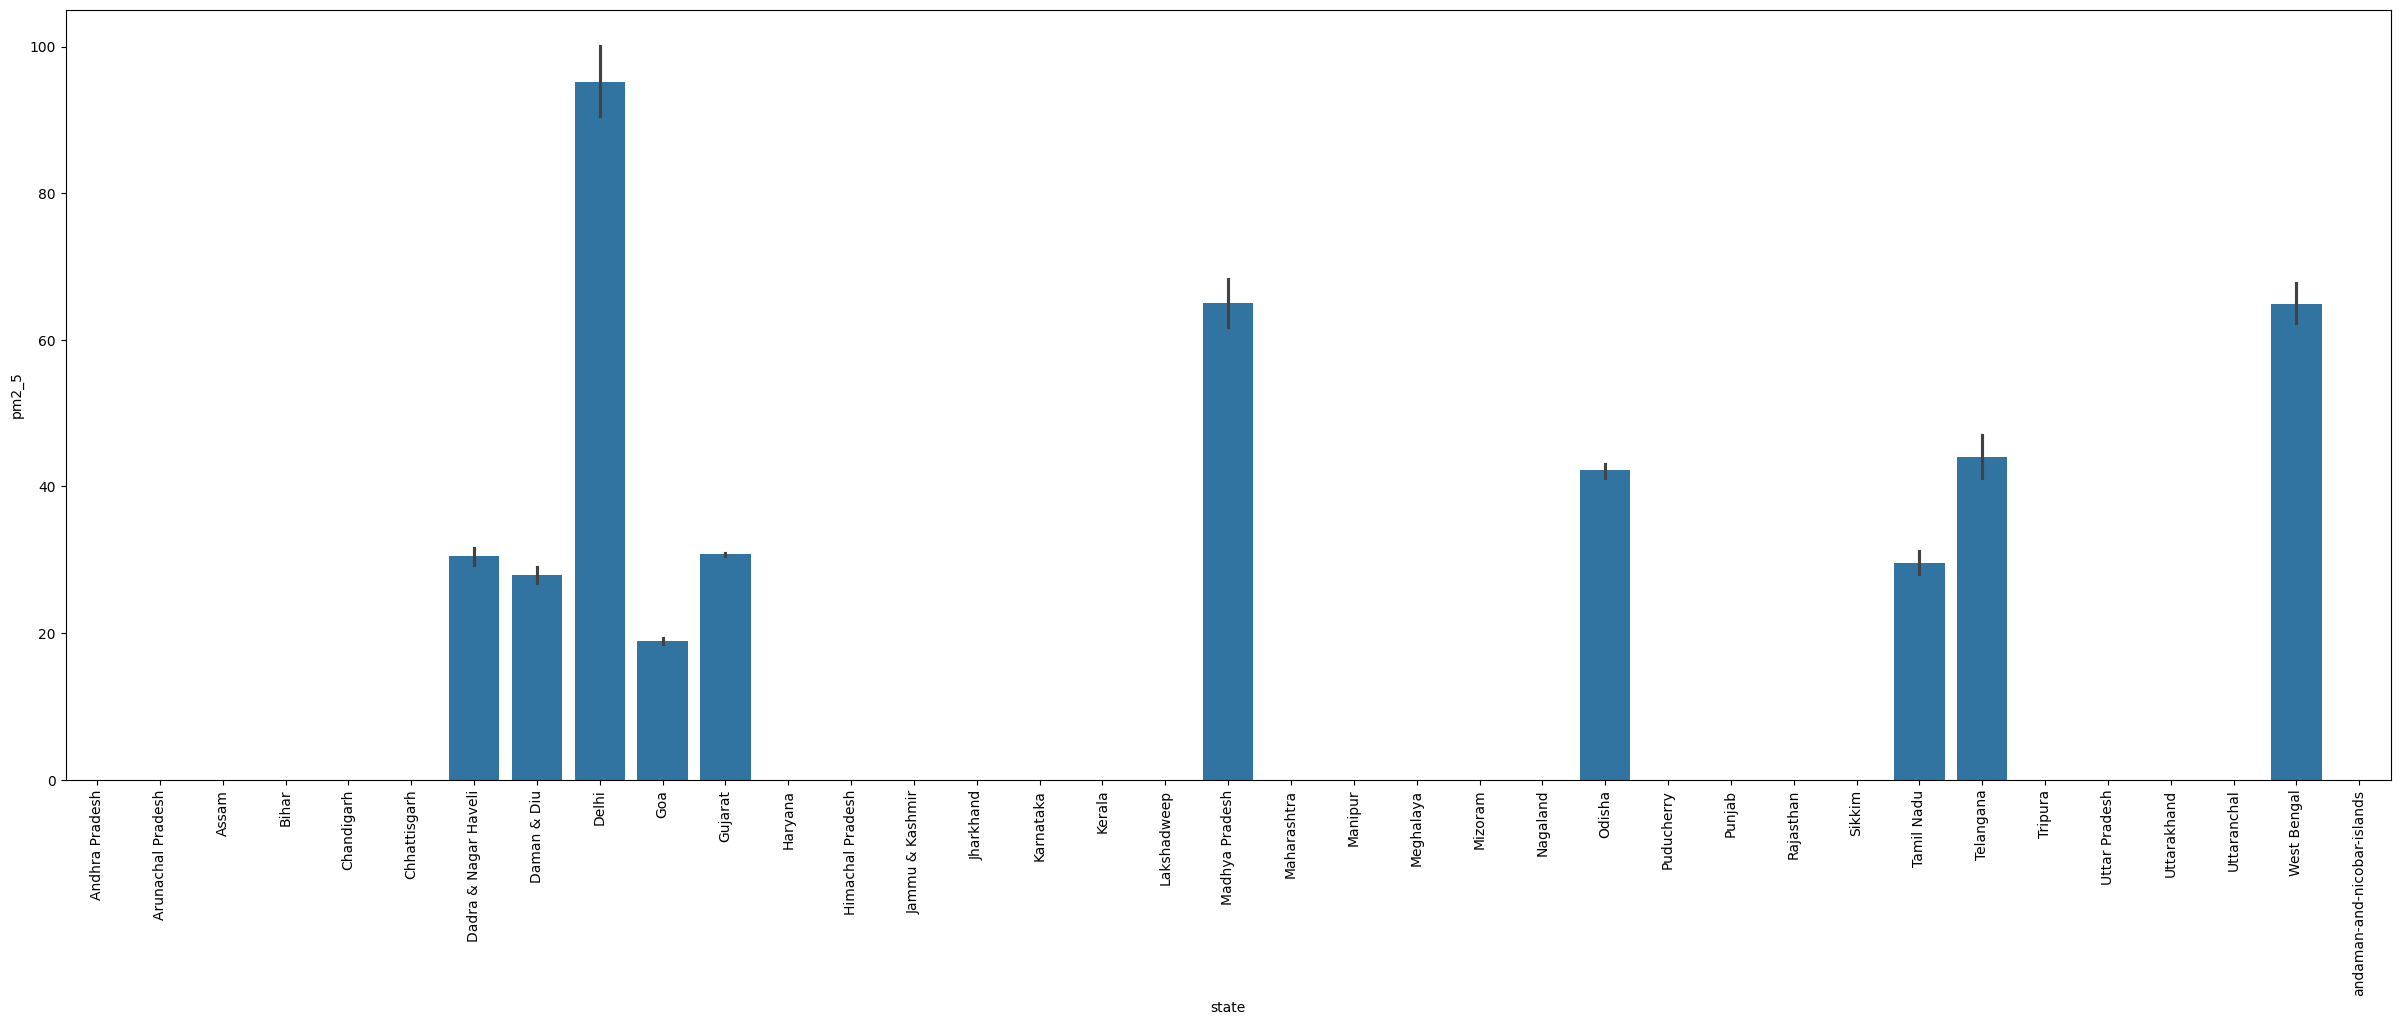

In [89]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)

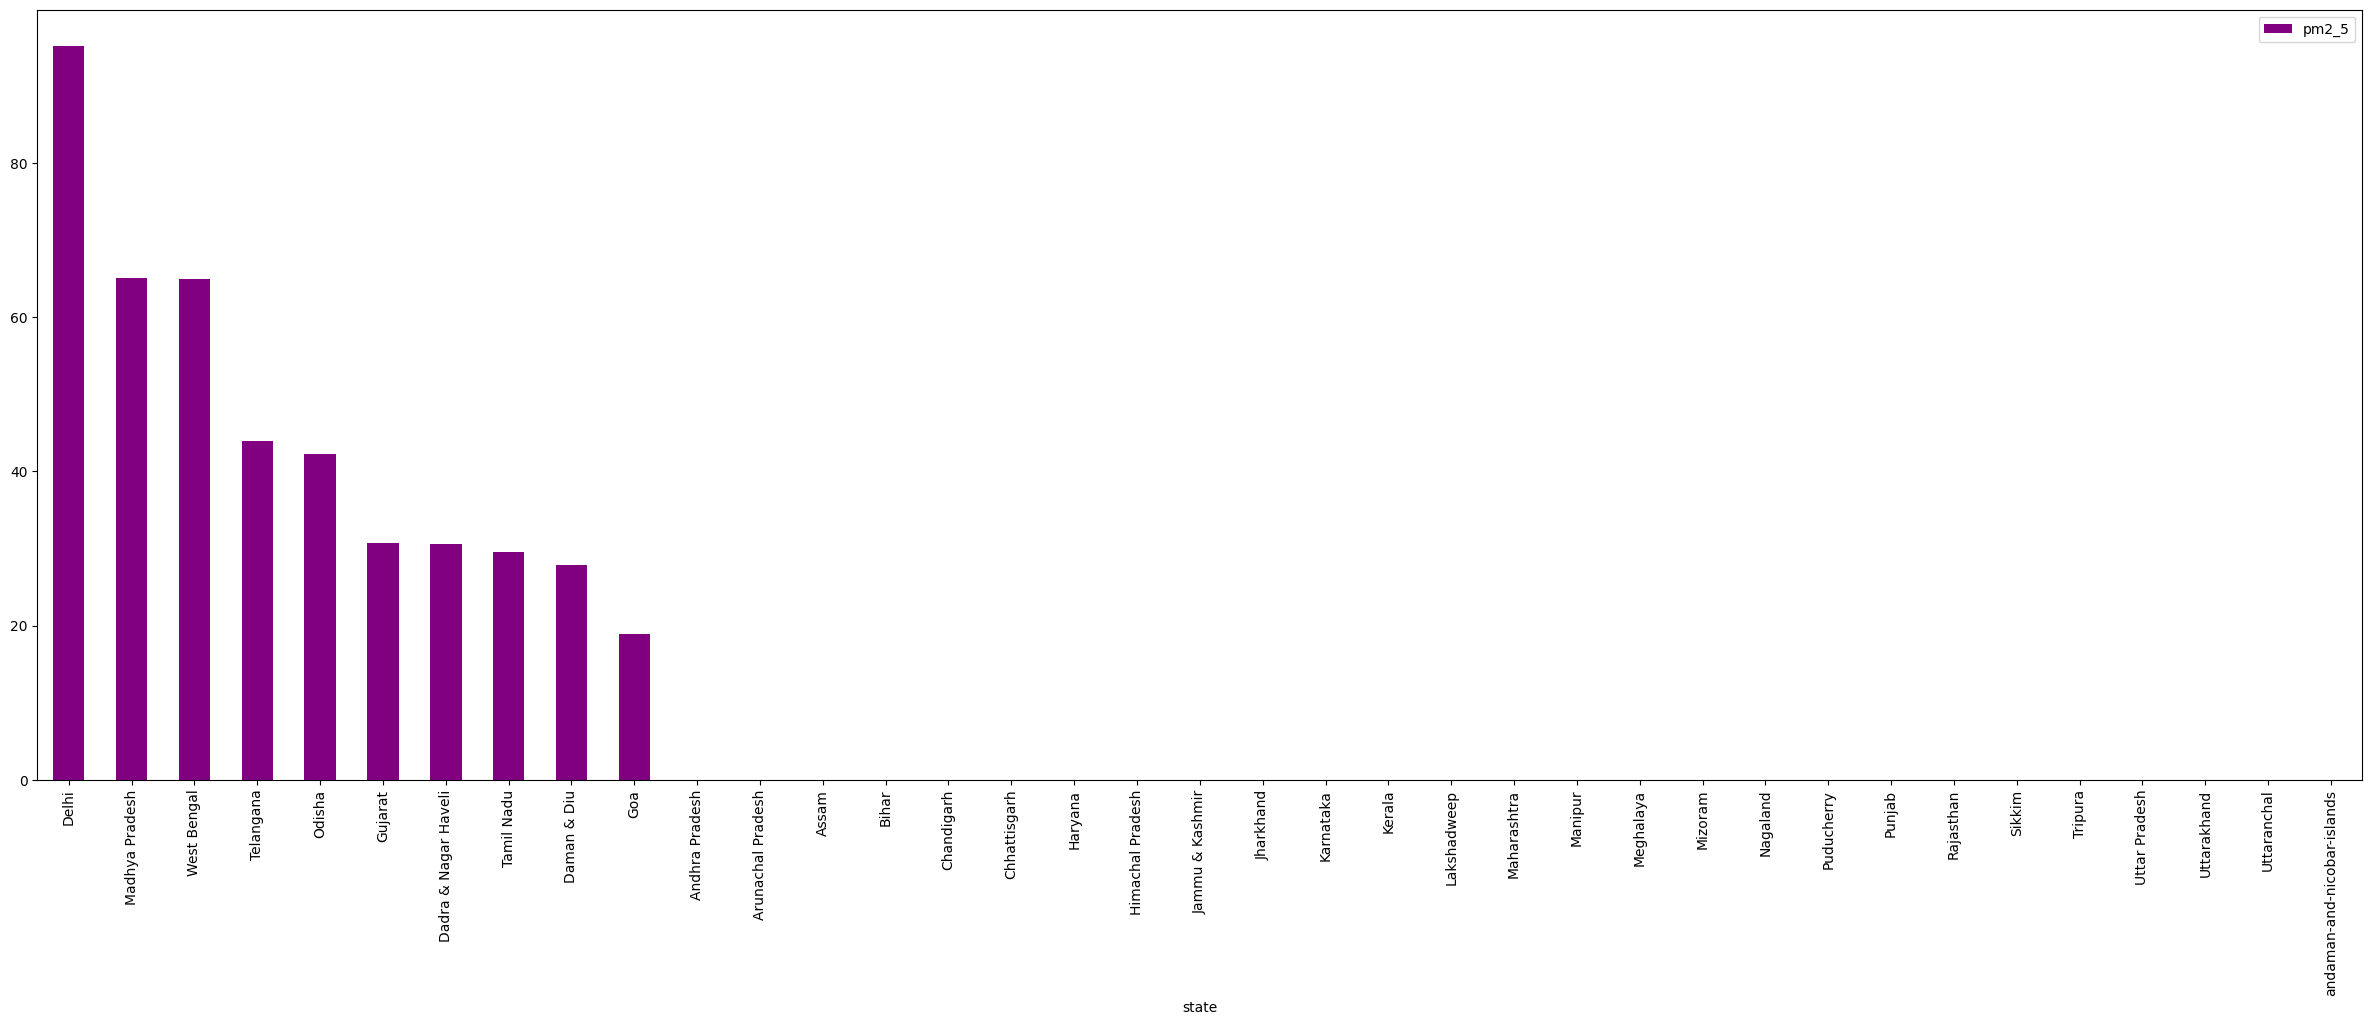

In [91]:
df[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5', ascending=False).plot.bar(color='purple')
plt.show()

### Checking all null values and treating those null values.

In [96]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

,Total,Percent
pm2_5,425754,97.859185
spm,236908,54.453097
agency,149466,34.354630
stn_code,145264,33.388804
rspm,40035,9.202010
so2,34632,7.960135
location_monitoring_station,27303,6.275571
no2,16222,3.728613
type,5357,1.231302
date,7,0.001609


# Dropping unnecessary columns


In [13]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [98]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


In [104]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [14]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

### Replace Missing values with zero is not recommended

In [109]:
# List of numerical columns where you want to replace null values with zero
#numerical_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# Replace null values in these columns with zeros
#df[numerical_columns] = df[numerical_columns].fillna(0)

# null values are replaced with zeros for the numerical data

### Multiple Imputation Overview

Multiple Imputation is a statistical technique used to handle missing data. This method involves several key steps:

- **Imputation**: The missing entries are filled in (imputed) several times to create multiple complete datasets.
- **Analysis**: Each of these complete datasets is then analyzed using standard statistical methods.
- **Pooling**: Finally, the results from these multiple analyses are combined to produce estimates that represent a comprehensive picture of the possible outcomes, accounting for the uncertainty inherent in the imputation of the missing data.

#### Benefits of Multiple Imputation
- **Robustness**: It provides a robust way to deal with missing data by incorporating the variability due to the uncertainty of the imputation.
- **Flexibility**: Multiple Imputation can be applied in a wide range of contexts and with various types of data, making it versatile.
- **Improved Accuracy**: By using multiple datasets, it typically yields more accurate statistical inferences than single-imputation methods.

#### Applications


In [15]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Focus on the numerical columns for imputation
numerical_columns = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# Initialize the imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform the imputation
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Verify the imputation
print(df[numerical_columns].isnull().sum())

so2      0
no2      0
rspm     0
spm      0
pm2_5    0
dtype: int64


In [111]:
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,0.0,0.0,0.0
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,0.0,0.0,0.0
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,0.0,0.0,0.0
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,0.0,0.0,0.0
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,0.0,0.0,0.0


###### The Air Quality Index (AQI) helps the public easily understand the condition of the air and make informed health decisions because raw pollutant values are challenging to compare and interpret without conversion, and they provide less information about health impacts.


In [16]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [17]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [18]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,98.270643,0.0
1,86.819692,0.0
2,110.310424,0.0
3,96.149932,0.0
4,88.036646,0.0


In [19]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,208.886592,172.591061
1,188.592417,159.061612
2,230.622539,187.081693
3,203.262743,168.841828
4,189.290331,159.526888


##### The function `cal_aqi` computes the Air Quality Index (AQI) by identifying the highest concentration among four pollutants: sulfur dioxide (SO2), nitrogen dioxide (NO2), respirable suspended particulate matter (RSPM), and suspended particulate matter (SPM). It accepts these concentrations as inputs, compares them, and assigns the AQI to the value of the highest concentration. This approach highlights the most critical pollutant at a given time. The calculated AQI is then applied across the dataframe using the function within a `apply` method, and results are stored in the 'AQI' column.


In [20]:
def cal_aqi(si, ni, rspmi, spmi):
    return max(si, ni, rspmi, spmi)

df['AQI'] = df.apply(lambda x: cal_aqi(x['SOi'], x['Noi'], x['Rpi'], x['SPMi']), axis=1)
data = df[['state', 'SOi', 'Noi', 'Rpi', 'SPMi', 'AQI']]
data.head()


,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,172.591061,172.591061
1,Andhra Pradesh,3.875,8.750,0.0,159.061612,159.061612
2,Andhra Pradesh,7.750,35.625,0.0,187.081693,187.081693
3,Andhra Pradesh,7.875,18.375,0.0,168.841828,168.841828
4,Andhra Pradesh,5.875,9.375,0.0,159.526888,159.526888


In [21]:
def AQI_Range(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Moderate"
    elif x <= 200:
        return "Poor"
    elif x <= 300:
        return "Unhealthy"
    elif x <= 400:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Applying the function to the DataFrame
df['AQI_Range'] = df['AQI'].apply(AQI_Range)

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,98.270643,208.886592,41.895538,6.000,21.750,0.0,172.591061,172.591061,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,86.819692,188.592417,33.550199,3.875,8.750,0.0,159.061612,159.061612,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,110.310424,230.622539,50.814821,7.750,35.625,0.0,187.081693,187.081693,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,96.149932,203.262743,39.671624,7.875,18.375,0.0,168.841828,168.841828,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,88.036646,189.290331,33.906577,5.875,9.375,0.0,159.526888,159.526888,Poor


In [22]:
df['AQI_Range'].value_counts()

AQI_Range
Poor              230124
Unhealthy          72870
Moderate           50168
Hazardous          35974
Very Unhealthy     33690
Good               12242
Name: count, dtype: int64

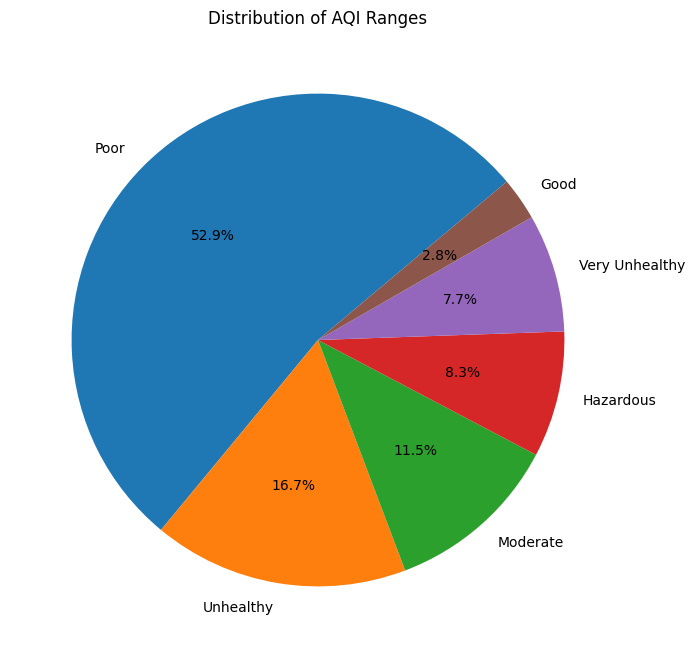

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'AQI_Range' is the column of interest
aqi_counts = df['AQI_Range'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', startangle=40)
plt.title('Distribution of AQI Ranges')
plt.show()


### Starting Training Models

In [24]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,172.591061
1,3.875,8.750,0.0,159.061612
2,7.750,35.625,0.0,187.081693
3,7.875,18.375,0.0,168.841828
4,5.875,9.375,0.0,159.526888


In [25]:
Y.head()

0    172.591061
1    159.061612
2    187.081693
3    168.841828
4    159.526888
Name: AQI, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler

# STEP 1: Split the data FIRST to avoid any overlap between train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=70)

# STEP 2: Fit the scaler ONLY on training data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)  # ✅ fit only on training data

# STEP 3: Apply the same transformation to test data (no fitting again!)
X_test_scaled = scaler_X.transform(X_test)        # ✅ only transform, no fit


scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))  # ✅ fit only on Y_train
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))        # ✅ transform Y_test without fitting




print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(304547, 4) (130521, 4) (304547,) (130521,)


## Classifiers to be Used

- **Linear Regression (LR)** - A basic but powerful technique for regression.
- **Decision Tree Regressor (DTR)** - A model that uses a tree-like graph of decisions.
- **Random Forest Regressor (RFR)** - An ensemble of decision trees.
- **Gradient Boosting Regressor (GBR)** - An ensemble technique that builds models sequentially.
- **Support Vector Regressor (SVR)** - A versatile regression method that can capture complex relationships.


## Linear Regression (LR)

### What is it?

Linear Regression predicts a dependent variable value (y) based on a given independent variable (x). It achieves this by calculating the linear relationship between x and y.


## Implementation and Performance Evaluation for Linear Regression

In [142]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model on scaled data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, Y_train_scaled)

# Predict on test data
Y_pred_scaled = lr_model.predict(X_test_scaled)

# Inverse-transform the predictions and true values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test_scaled)

# Evaluate the model using original scale
mae = mean_absolute_error(Y_test_original, Y_pred)
mse = mean_squared_error(Y_test_original, Y_pred)
r2 = r2_score(Y_test_original, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 9.08719139213465
Mean Squared Error: 182.61371867268156
R^2 Score: 0.9851499999365905


## Interpretation of Linear Regression Performance


The Linear Regression model achieves an \(R^2\) score of 0.985, indicating excellent predictive power by explaining 98.5% of the variance in the target variable. The Mean Squared Error (MSE) of 182.613 and Mean Absolute Error (MAE) of 9.087 suggest that the model's predictions are generally close to the actual values, with an average deviation of about 9 units. These metrics, especially in light of the high \(R^2\) score, confirm the model's effectiveness and reliability for practical applications.




## Decision Tree Regressor (DTR)

### What is it?

A Decision Tree Regressor creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.


## Implementation and Performance Evaluation for Decision Tree Regressor

In [144]:

# Initialize the Decision Tree Regressor
dtr_model = DecisionTreeRegressor(random_state=42)

# Train the model on scaled data
dtr_model.fit(X_train_scaled, Y_train_scaled)

# Predict on test data
Y_pred_scaled = dtr_model.predict(X_test_scaled)

# Inverse-transform the predictions and true values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))  # Reshape needed because prediction is 1D
Y_test_original = scaler_Y.inverse_transform(Y_test_scaled)

# Evaluate the model using original scale
mae = mean_absolute_error(Y_test_original, Y_pred)
mse = mean_squared_error(Y_test_original, Y_pred)
r2 = r2_score(Y_test_original, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.026323696774721687
Mean Squared Error: 2.523950047655572
R^2 Score: 0.999794754421299


## Interpretation of Decision Tree Regressor Performance


The Decision Tree Regressor demonstrates excellent performance with a very low Mean Absolute Error of **0.026**, indicating that predictions are on average less than 0.03 units off. The Mean Squared Error of **2.52** shows minimal variance in prediction errors, and the extremely high **R² score of 0.9998** confirms that the model explains nearly all the variability in the target variable, making it highly accurate and reliable for this dataset.


## Random Forest Regressor (RFR)

### What is it?

Random Forest is an ensemble learning method for regression that constructs a multitude of decision trees at training time. It outputs the mean prediction of the individual trees, providing a more accurate and stable prediction than a single decision tree.


## Implementation and Performance Evaluation for Random Forest Regressor

In [145]:
# Initialize the Random Forest Regressor
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on scaled data
rfr_model.fit(X_train_scaled, Y_train_scaled.ravel())  # .ravel() flattens the array for compatibility

# Predict on test data
Y_pred_scaled = rfr_model.predict(X_test_scaled)

# Inverse-transform the predictions and true values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))  # Reshape to 2D for inverse_transform
Y_test_original = scaler_Y.inverse_transform(Y_test_scaled)

# Evaluate the model using original scale
mae = mean_absolute_error(Y_test_original, Y_pred)
mse = mean_squared_error(Y_test_original, Y_pred)
r2 = r2_score(Y_test_original, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.01854530499836949
Mean Squared Error: 1.0247315357454387
R^2 Score: 0.9999166696594243


## Interpretation of Random Forest Regressor Performance

## Random Forest Regressor Performance Interpretation

The Random Forest Regressor shows outstanding performance, with a very low Mean Absolute Error of **0.0185**, indicating highly accurate predictions with minimal deviation from actual values. The Mean Squared Error of **1.02** suggests low variance in prediction errors, and the exceptionally high **R² score of 0.9999** indicates that the model explains nearly all of the variability in the target variable. This confirms that the Random Forest Regressor is highly effective and reliable for this dataset.


## Gradient Boosting Regressor (GBR)

### What is it?

Gradient Boosting is a method that produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion, enhancing performance and accuracy step-by-step.


## Implementation and Performance Evaluation for Gradient Boosting Regressor

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on scaled data
gbr_model.fit(X_train_scaled, Y_train_scaled.ravel())  # .ravel() to flatten for compatibility

# Predict on test data
Y_pred_scaled = gbr_model.predict(X_test_scaled)

# Inverse-transform the predictions and true values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))  # Reshape for inverse_transform
Y_test_original = scaler_Y.inverse_transform(Y_test_scaled)

# Evaluate the model using original scale
mae = mean_absolute_error(Y_test_original, Y_pred)
mse = mean_squared_error(Y_test_original, Y_pred)
r2 = r2_score(Y_test_original, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 0.8956367905153679
Mean Squared Error: 3.0972812064833333
R^2 Score: 0.9997481315946743


## Interpretation of Gradient Boosting Regressor Performance

## Gradient Boosting Regressor Performance Interpretation

The Gradient Boosting Regressor delivers strong performance with a Mean Absolute Error of **0.896**, indicating that predictions deviate from actual values by less than one unit on average. The Mean Squared Error of **3.10** suggests moderate variance in prediction errors. Despite this, the model achieves a very high **R² score of 0.9997**, meaning it explains nearly all the variability in the target variable. These results indicate that the model is effective, though slightly less precise than the Random Forest in this specific case.


### Support Vector Regressor (SVR)

**What is it?**  
Support Vector Regression (SVR) applies the same principles as Support Vector Machines (SVM) used for classification. The goal of SVR is to fit as many data points as possible within a specified margin (epsilon) around the predicted function. It aims to find a model that is as flat as possible while allowing some tolerance for error. SVR is particularly useful for capturing complex, non-linear relationships when using kernel functions.



## Implementation and Performance Evaluation for Support Vector Regressor

In [27]:
# Initialize the Support Vector Regressor
svr_model = SVR(kernel='linear', C=1, epsilon=0.1)

# Train the model on scaled data
svr_model.fit(X_train_scaled, Y_train_scaled.ravel())  # .ravel() to flatten the target array

# Predict on test data
Y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse-transform the predictions and true values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1))  # Reshape for inverse_transform
Y_test_original = scaler_Y.inverse_transform(Y_test_scaled)

# Evaluate the model using original scale
mae = mean_absolute_error(Y_test_original, Y_pred)
mse = mean_squared_error(Y_test_original, Y_pred)
r2 = r2_score(Y_test_original, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 5.395043572564433
Mean Squared Error: 57.87393880635857
R^2 Score: 0.9947120477496036


## Interpretation of Support Vector Regressor Performance

### SVR Model Performance Interpretation

The Support Vector Regressor (SVR) achieved a high \(R^2\) score of 0.9947, indicating that it explains approximately 99.47% of the variance in the target variable. The Mean Absolute Error (MAE) of 5.39 and Mean Squared Error (MSE) of 57.87 suggest that while the model makes relatively accurate predictions, its error is higher compared to tree-based models. This indicates that SVR captures the overall pattern well but may not fit the data as precisely as ensemble methods like Random Forest or Gradient Boosting in this case.


## Comparison of All Classifiers

### Model Performance Summary

Among all the models tested, **Random Forest Regressor** delivered the best performance with the lowest Mean Absolute Error (0.0185), lowest Mean Squared Error (1.02), and the highest R² score (0.9999), indicating highly accurate and stable predictions. 

**Decision Tree Regressor** also performed exceptionally well, slightly behind Random Forest, with very low errors and a near-perfect R² score.

**Gradient Boosting Regressor** achieved strong performance with low errors and a high R² score (0.9997), making it a reliable choice as well.

**Linear Regression**, while having a high R² score (0.9851), showed significantly higher error values, indicating it may not capture non-linear patterns effectively in this dataset.

**Support Vector Regressor (SVR)** performed better than Linear Regression in terms of R² (0.9947), but its MAE and MSE were higher than those of tree-based models, suggesting it's less accurate on this particular dataset.

**Conclusion:** Tree-based ensemble methods (Random Forest and Gradient Boosting) outperformed linear and SVR models, making them more suitable for this regression task.

